# Milestone 3 Summary Code

**Disclaimer**

This document contains highlights of the EDA performed on my project's datasets from the prior week's notebooks leading up to the milestone 3 submission. The code and visualizations shown in the notebook follow the same order as they are discussed in the main word doc. This notebook is broken down into three distinct sections for the three corresponding datasets that were analyzed. Each dataset subsection for preprocessing, univariate analysis, and bivariate analysis.

It is heavily recommended that this notebook be read in tandem as you traverse the milestone document as they follow the same flow and will lead to an overall clearer undersanding of my EDA and findings. 

Thank you and enjoy!

## Libraries

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Datasets

In [5]:
# Credit Card Fraud Data
CreditCardFraud = pd.read_csv("fraudTrain.csv")

# Credit Card Approval Dataset
CreditCardApproval = pd.read_csv("Application_Data.csv")

# Loan Default Prediction
LoanDefaultPrediction = pd.read_csv("LoanDefault.csv")

## Helper Functions

In [7]:
def duplicate_rows(df):
    duplicates = df[df.duplicated(keep=False)]
    if duplicates.empty:
        print("No duplicates found in the dataset")
    else:
        print(f"{len(duplicates)} duplicate rows found:\n")
        print(duplicates)
    return duplicates

In [8]:
def missing_null_vals(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print("No missing values found in the DataFrame.")
    else:
        print("Missing values found in the following columns:\n")
        print(missing)

In [9]:
def column_duplicates(df, col):
    duplicates = df.duplicated(subset=[col], keep=False)
    non_unique_vals = df[duplicates][col].unique()
    if len(non_unique_vals) == 0:
        print(f"No duplicate values found in column '{col}'.")
    else:
        print(f"{len(non_unique_vals)} rows with duplicate values found in column '{col}':\n")
        print(f"Non-Unqiue {col} Example: {non_unique_vals[0]}")
    return non_unique_vals

In [10]:
def one_hot_encoding(df, cols):
    df_encoded = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col])
        dummies = dummies.astype(int)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
    return df_encoded

In [11]:
def categorical_bar_plots(df, col, color, rot):
    counts = df[col].value_counts()
    figsize=(8, 5)
    plt.figure(figsize=figsize)
    sns.barplot(x=counts.index.astype(str), y=counts.values, color=color)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=rot, fontsize=9)
    plt.tight_layout()
    plt.show()

In [12]:
def get_counts(lst):
    counts = lst.value_counts()
    return counts

In [13]:
def col_summary_stastistics(df, col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()

    print(f"{col} Mean: {mean_val}")
    print(f"{col} Median: {median_val}")
    print(f"{col} Mode: {mode_val.tolist()}")
    print('\n')

In [14]:
def box_plot(df, col):
    figsize=(8, 5)
    sns.boxplot(y=df[col], color='cyan', whis=1.5)
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [15]:
def distribution_plots(df, col):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.suptitle(f"EDA Plots for Column: {col}", fontsize=16)

    #Hist
    sns.histplot(df[col], kde=False, ax=axes[0, 0], color='skyblue', bins='auto')
    axes[0, 0].set_title('Histogram')

    #KDE
    sns.kdeplot(df[col], ax=axes[0, 1], fill=True, color='orange')
    axes[0, 1].set_title('KDE Plot')

    #Swarm
    sns.swarmplot(df[col].sample(n=1000), ax=axes[1, 0], size=3)

    #Violin
    sns.violinplot(df[col], ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

In [16]:
def get_hist_min_max(df, col, bins='auto'):
    #create a histogram with selected amount of bins (will default to the auto selected value)
    counts, bin_edges = np.histogram(df[col], bins=bins)

    #identify bins with data
    nonzero_indices = np.where(counts > 0)[0]

    min_val = bin_edges[nonzero_indices[0]]
    max_val = bin_edges[nonzero_indices[-1] + 1]

    print(f"Histogram minimum: {min_val}")
    print(f"Histogram maximum: {max_val}")

In [17]:
def create_correlation_plot(df: pd.DataFrame, title: str = "Correlation Matrix", figsize: tuple = (10, 8), annot: bool = True, cmap: str = "coolwarm", fmt: str = ".2f"):
    # Select only numerical columns for correlation calculation
    df_numeric = df.select_dtypes(include=np.number)

    # Calculate the correlation matrix
    correlation_matrix = df_numeric.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create the heatmap
    # annot=True displays the correlation values on the heatmap
    # cmap defines the color map (e.g., 'coolwarm' for diverging colors)
    # fmt specifies the format of the annotation values
    # linewidths and linecolor add lines between cells for better separation
    sns.heatmap(correlation_matrix,
                annot=annot,
                cmap=cmap,
                fmt=fmt,
                linewidths=.5,
                linecolor='black',
                cbar_kws={'label': 'Correlation Coefficient'})

    # Set the title of the plot
    plt.title(title, fontsize=16)
    plt.tight_layout()

    # Return the current axes for further manipulation if needed
    return plt.gca()

In [18]:
def scatter_two_columns(df, col_x, col_y, title=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_x], df[col_y], alpha=0.7, edgecolor='k')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(title if title else f"Scatter Plot: {col_x} vs {col_y}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
def pairplot_selected_columns(df, columns=None, hue=None, diag_kind='auto', kind='scatter'):
    # Use only specified columns or default to all numeric ones
    if columns is None:
        data = df.select_dtypes(include='number')
    else:
        missing = [col for col in columns if col not in df.columns]
        if missing:
            raise ValueError(f"The following columns are not in the DataFrame: {missing}")
        data = df[columns]

    # Create the pairplot
    sns.pairplot(data, hue=hue, diag_kind=diag_kind, kind=kind)
    plt.show()

In [20]:
def grouped_hist(df, measure_col, group_col, bins):
    groups = df[group_col].unique()
    figsize=(8, 5)
    for group in groups:
        subset = df[df[group_col] == group][measure_col].dropna()
        sns.histplot(subset, bins=bins, label=str(group), kde=False, alpha=0.5)
    
    plt.xlabel(measure_col)
    plt.ylabel("Count")
    plt.title(f"Grouped Histogram of {measure_col} by {group_col}")
    plt.legend(title=group_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [21]:
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
        else:
            if not df[col].mode().empty:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
            else:
                df[col] = df[col].fillna('Missing')
    return df

In [22]:
def get_top_n_categories(df, col, n):
    return df[col].value_counts().head(n)

## Credit Card Fraud

### Preprocessing

it appears that our first column functions similar to an index/unique identifier. As this will most likely not be too useful for our analysis (and given the fact that we already have an index), we can drop the column.

In [26]:
CreditCardFraud = CreditCardFraud.drop('Unnamed: 0', axis=1)

In [27]:
CreditCardFraud.sample(n=10, random_state=42)

trans_date_trans_time               cc_num  \
1045211   2020-03-09 15:09:26         577588686219   
547406    2019-08-22 15:49:01       30376238035123   
110142    2019-03-04 01:34:16     4658490815480264   
1285953   2020-06-16 20:04:38     3514897282719543   
271705    2019-05-14 05:54:48     6011381817520024   
391181    2019-06-28 10:46:05  4855488158131690372   
962652    2020-01-23 09:09:59       30427035050508   
974821    2020-01-30 11:23:44      213120463918358   
127056    2019-03-11 10:35:53     6597888193422452   
1122630   2020-04-12 18:50:07        4809701904914   

                                            merchant        category     amt  \
1045211                              fraud_Towne LLC        misc_pos  194.51   
547406                             fraud_Friesen Ltd  health_fitness   52.32   
110142                                fraud_Mohr Inc    shopping_pos    6.53   
1285953                      fraud_Gaylord-Powlowski            home    7.33   
271705   fraud_Christiansen, Goyette and Schamberger   gas_transport   64.29   
391181               fraud_Schuppe, Nolan and Hoeger    shopping_pos  129.80   
962652                               fraud_Kuhic Inc     grocery_pos  111.10   
974821           fraud_Douglas, Schneider and Turner    shopping_pos    8.43   
127056                            fraud_Hickle Group    shopping_pos    2.36   
1122630                      fraud_Bahringer-Streich     food_dining   88.00   

           first        last gender                         street  \
1045211    James  Strickland      M             25454 Leonard Lake   
547406   Cynthia       Davis      F             7177 Steven Forges   
110142      Tara    Richards      F          4879 Cristina Station   
1285953   Steven    Faulkner      M   841 Cheryl Centers Suite 115   
271705   Kristen       Allen      F      8619 Lisa Manors Apt. 871   
391181    Jeremy    Roberson      M             25887 Martin Inlet   
962652      John    Chandler      M  88325 Brandon Greens Apt. 477   
974821    Willie      Jordan      M                   529 West Key   
127056      Bill        Lane      M      4725 Hurst Curve Apt. 634   
1122630  Sabrina       Nolan      F   312 Eric Expressway Apt. 014   

                  city  ...      lat      long  city_pop  \
1045211  Spring Church  ...  40.6153  -79.4545       972   
547406           Sixes  ...  42.8250 -124.4409       217   
110142    Keisterville  ...  39.9636  -79.7853       184   
1285953     Farmington  ...  42.9580  -77.3083     10717   
271705        Lagrange  ...  41.6423 -104.1974       635   
391181    Graniteville  ...  44.1554  -72.4847       970   
962652         Detroit  ...  42.3770  -83.0796    673342   
974821     Spearsville  ...  32.9550  -92.5870      1758   
127056        Holliday  ...  33.6751  -98.6576      2317   
1122630    Phenix City  ...  32.4204  -85.0796     59744   

                                           job         dob  \
1045211     Public relations account executive  1997-10-23   
547406                     Retail merchandiser  1928-10-01   
110142                       Systems developer  1945-11-04   
1285953                         Cytogeneticist  1952-10-13   
271705   Product/process development scientist  1973-07-13   
391181                 Agricultural consultant  1993-09-29   
962652                     Broadcast presenter  1969-11-20   
974821                  Psychologist, forensic  1957-08-08   
127056                Chief Technology Officer  1964-08-23   
1122630                      Chemical engineer  1984-02-07   

                                trans_num   unix_time  merch_lat  merch_long  \
1045211  fff87d4340ef756a592eac652493cf6b  1362841766  40.420453  -78.865012   
547406   d0ad335af432f35578eea01d639b3621  1345650541  42.758860 -123.636337   
110142   87f26e3ea33f4ff4c7a8bad2c7f48686  1330824856  40.475159  -78.898190   
1285953  9c34015321c0fa2ae6fd20f9359d1d3e  1371413078  43.767506  -76.542384   
271705   198437c0

In [28]:
CreditCardFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

Looking at the results above, there are a few thing's that come to mind. Firsr our transaction date time and dob columns are objects, and will need to be converted to a date similar to what was performed in week 1's homework. Let's quickly fix that.

In [30]:
CreditCardFraud = CreditCardFraud.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [31]:
CreditCardFraud['trans_date_trans_time'] = pd.to_datetime(CreditCardFraud['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
CreditCardFraud['dob'] = pd.to_datetime(CreditCardFraud['dob'], format='%Y-%m-%d')

CreditCardFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  category      
 3   category               1296675 non-null  category      
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  category      
 6   last                   1296675 non-null  category      
 7   gender                 1296675 non-null  category      
 8   street                 1296675 non-null  category      
 9   city                   1296675 non-null  category      
 10  state                  1296675 non-null  category      
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [32]:
CreditCardFraud['age'] = (datetime.now() - CreditCardFraud['dob']).dt.days // 365
CreditCardFraud[['dob','age']].sample(n=5, random_state=42)

dob  age
1045211 1997-10-23   27
547406  1928-10-01   96
110142  1945-11-04   79
1285953 1952-10-13   72
271705  1973-07-13   51

Next, let's check for any duplicate rows

In [34]:
duplicate_rows(CreditCardFraud)

No duplicates found in the dataset


Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, age]
Index: []

[0 rows x 23 columns]

In [35]:
non_unique_cc_nums = column_duplicates(CreditCardFraud, 'cc_num')

CreditCardFraud[CreditCardFraud['cc_num'] == non_unique_cc_nums[0]][0:3]

983 rows with duplicate values found in column 'cc_num':

Non-Unqiue cc_num Example: 2703186189652095


trans_date_trans_time            cc_num                    merchant  \
0      2019-01-01 00:00:18  2703186189652095  fraud_Rippin, Kub and Mann   
1565   2019-01-01 16:53:34  2703186189652095        fraud_Ruecker-Mayert   
2299   2019-01-01 23:02:37  2703186189652095      fraud_Pacocha-Weissnat   

       category     amt     first   last gender          street  \
0      misc_net    4.97  Jennifer  Banks      F  561 Perry Cove   
1565  kids_pets  114.79  Jennifer  Banks      F  561 Perry Cove   
2299  kids_pets   16.55  Jennifer  Banks      F  561 Perry Cove   

                city  ...     long  city_pop                        job  \
0     Moravian Falls  ... -81.1781      3495  Psychologist, counselling   
1565  Moravian Falls  ... -81.1781      3495  Psychologist, counselling   
2299  Moravian Falls  ... -81.1781      3495  Psychologist, counselling   

            dob                         trans_num   unix_time  merch_lat  \
0    1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1565 1988-03-09  fadb4dafef079a1a0381360bbe80b3c0  1325436814  35.083586   
2299 1988-03-09  1318500aff9644abe2e4a8c562eab7bc  1325458957  35.532409   

     merch_long  is_fraud  age  
0    -82.048315         0   37  
1565 -80.625951         0   37  
2299 -82.170017         0   37  

[3 rows x 23 columns]

In [36]:
missing_null_vals(CreditCardFraud)

No missing values found in the DataFrame.


In [37]:
cols_to_encode = ['merchant', 'category', 'gender']
CreditCardFraudEncoded = one_hot_encoding(CreditCardFraud, cols_to_encode)

In [38]:
CreditCardFraudEncoded[['M','F']].sample(n=5)

M  F
338867   0  1
431506   1  0
414540   0  1
1120906  0  1
722192   0  1

### Univariate Analysis

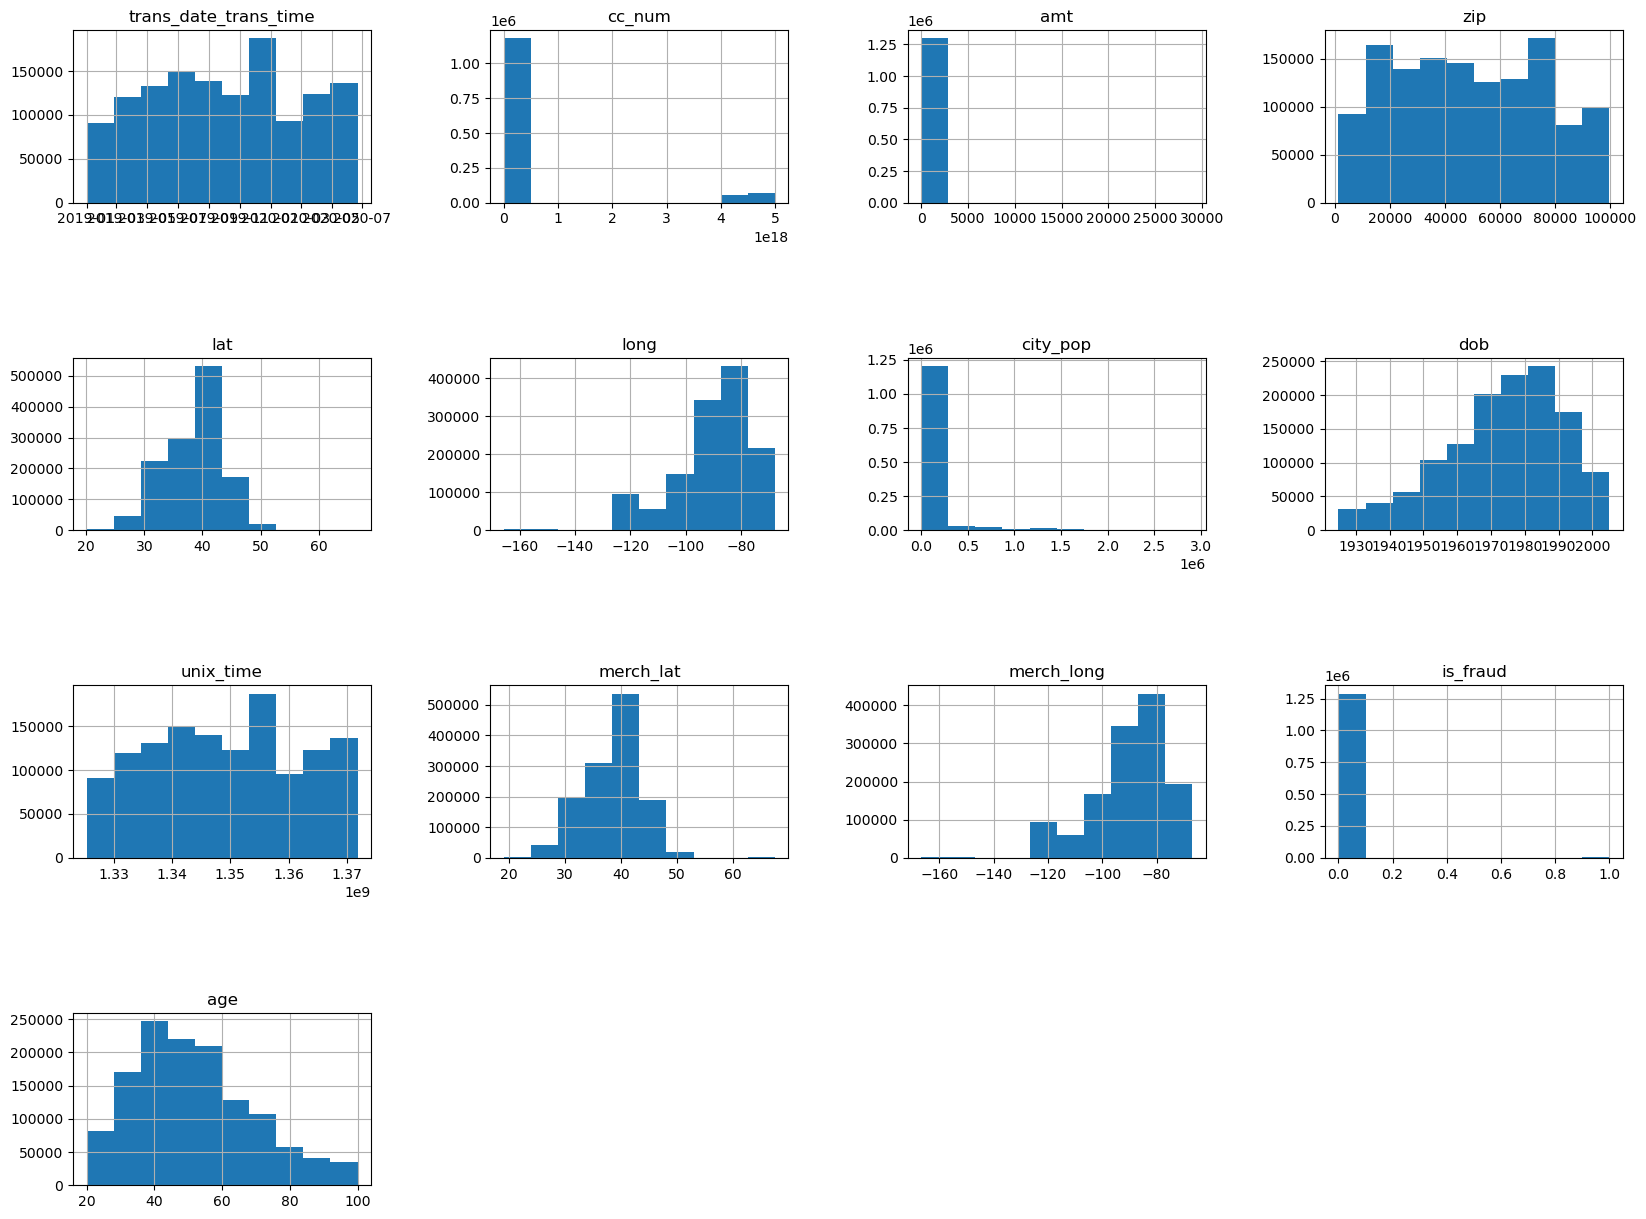

In [40]:
CreditCardFraud.hist(figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.9)

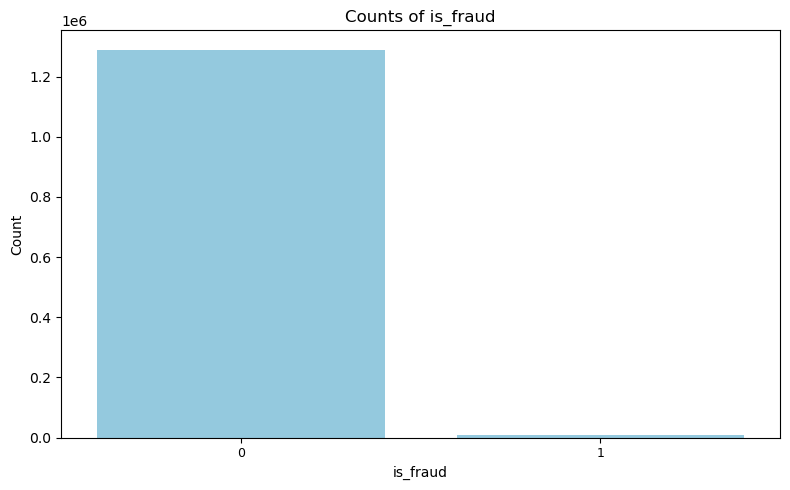

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [41]:
categorical_bar_plots(CreditCardFraud, 'is_fraud', 'skyblue', 0)
get_counts(CreditCardFraud['is_fraud'])

age Mean: 51.21648678350396
age Median: 49.0
age Mode: [49]




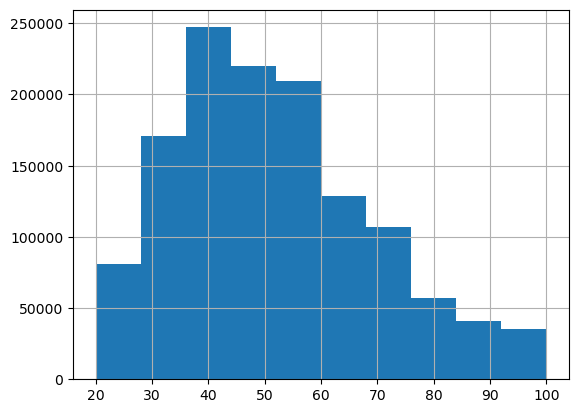

In [42]:
CreditCardFraud['age'].hist()
col_summary_stastistics(CreditCardFraud, 'age')

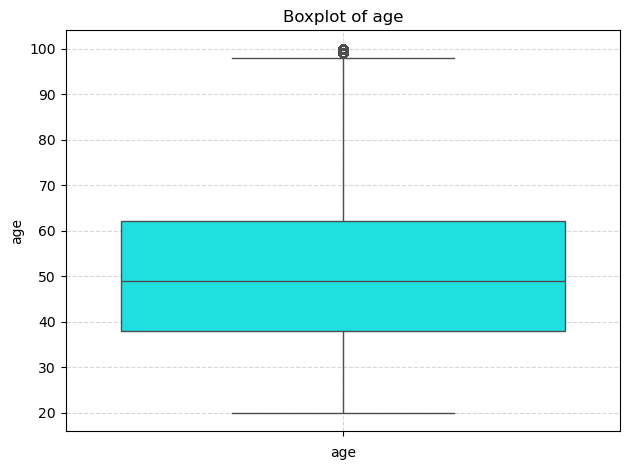

In [43]:
box_plot(CreditCardFraud, 'age')

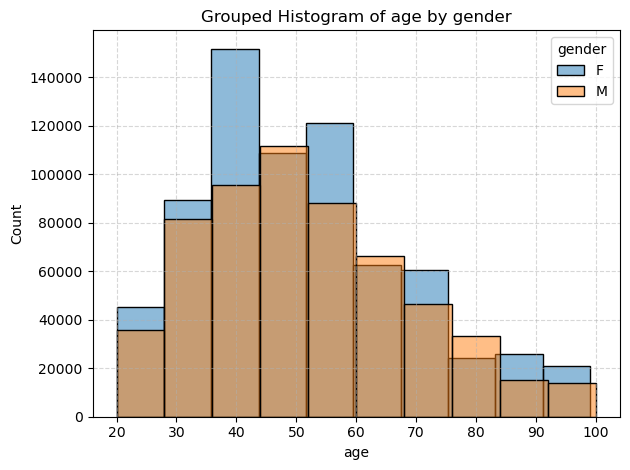

In [44]:
grouped_hist(CreditCardFraud, 'age', 'gender', 10)

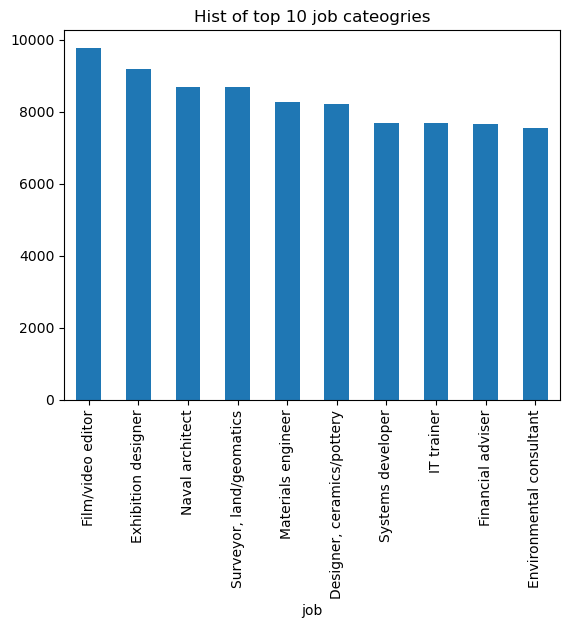

In [45]:
top_10_jobs = get_top_n_categories(CreditCardFraud, 'job', 10)
top_10_jobs.plot(kind='bar')
plt.title('Hist of top 10 job cateogries')
plt.show()

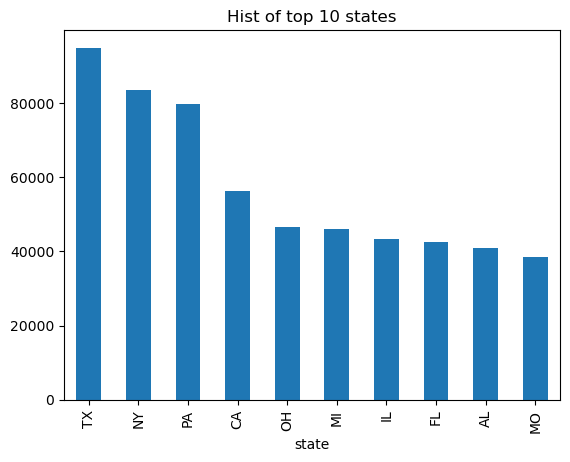

In [46]:
top_10_states = get_top_n_categories(CreditCardFraud, 'state', 10)
top_10_states.plot(kind='bar')
plt.title('Hist of top 10 states')
plt.show()

Histogram minimum: 1.0
Histogram maximum: 28948.9


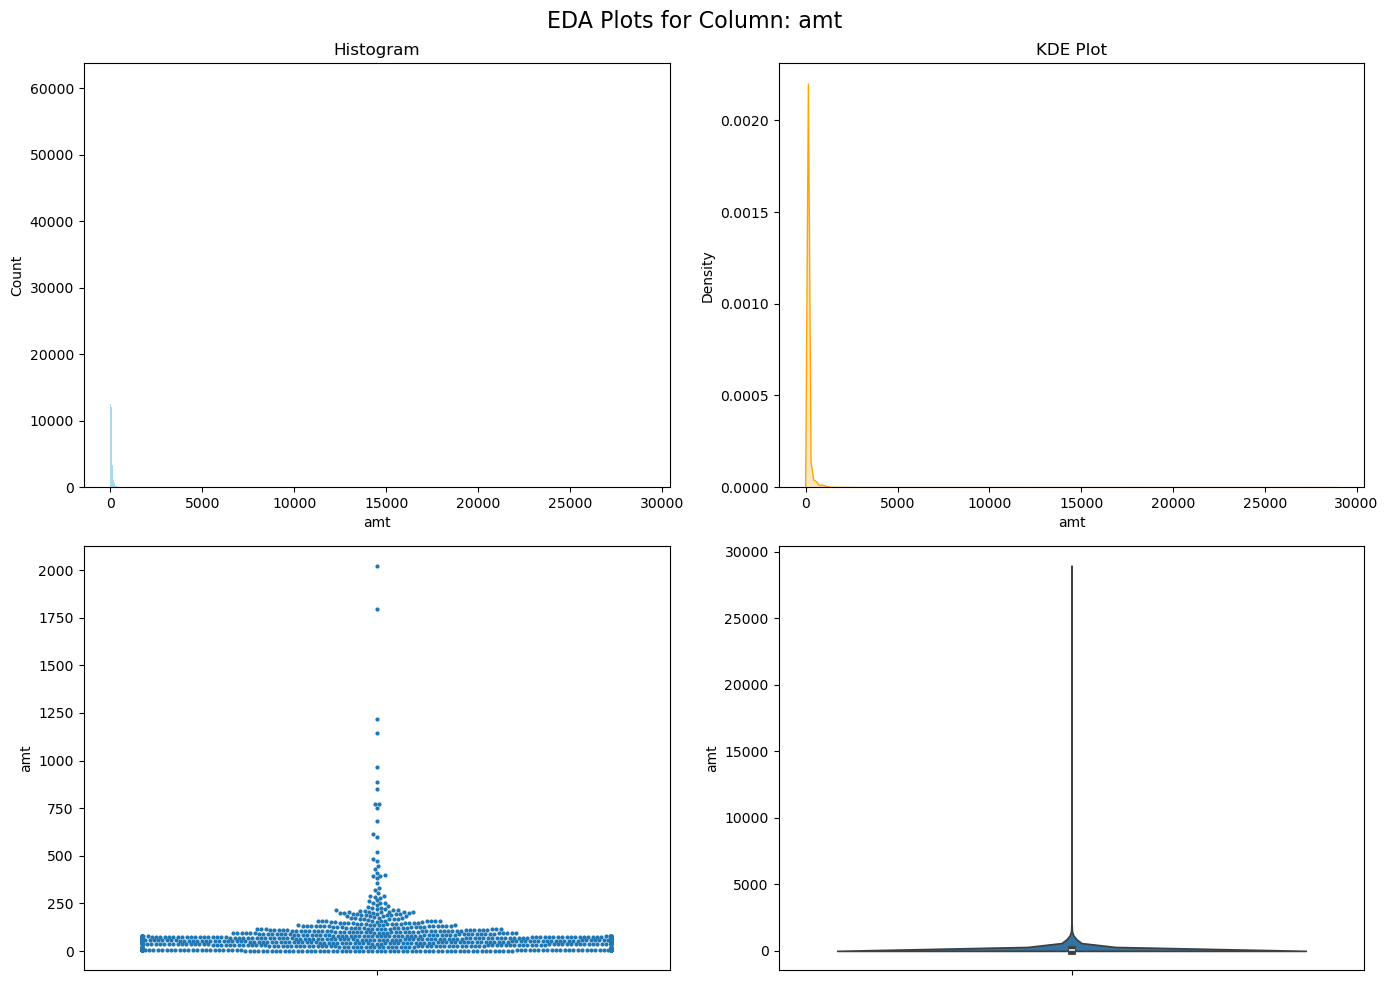

In [47]:
get_hist_min_max(CreditCardFraud, 'amt', 'auto')
distribution_plots(CreditCardFraud, 'amt')

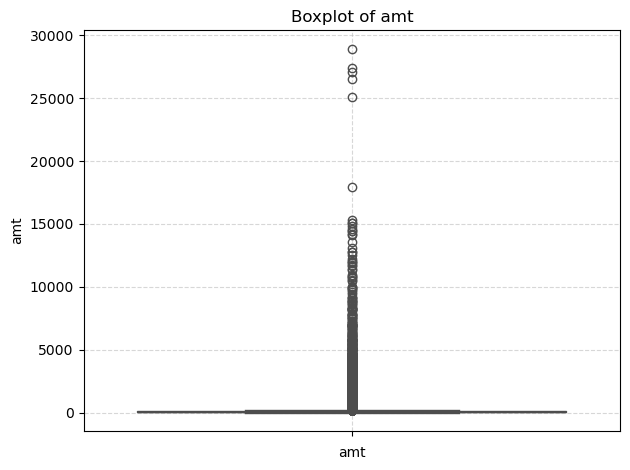

amt Mean: 70.35103545607033
amt Median: 47.52
amt Mode: [1.14]


Boxplot Upper Bound: 193.375


In [48]:
box_plot(CreditCardFraud, 'amt')
col_summary_stastistics(CreditCardFraud, 'amt')
q1 = CreditCardFraud['amt'].quantile(0.25)
q3 = CreditCardFraud['amt'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")

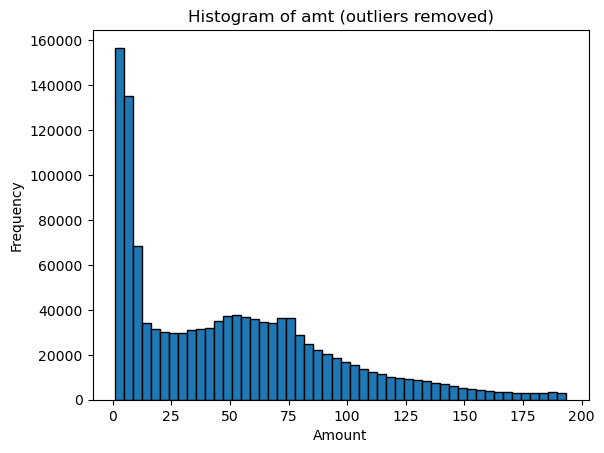

In [49]:
CreditCardFraud[CreditCardFraud['amt'] <= 193.375]['amt'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of amt (outliers removed)')
plt.show()

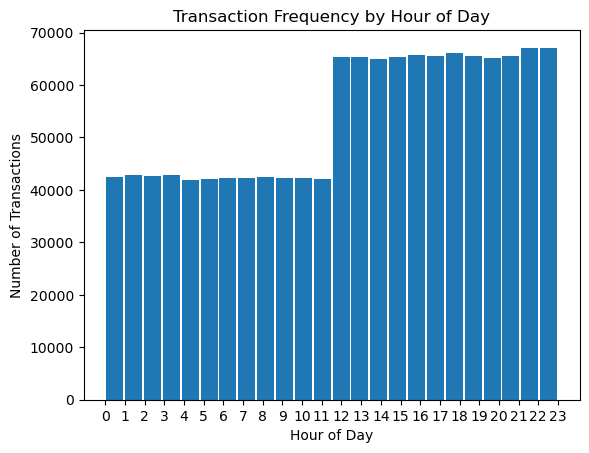

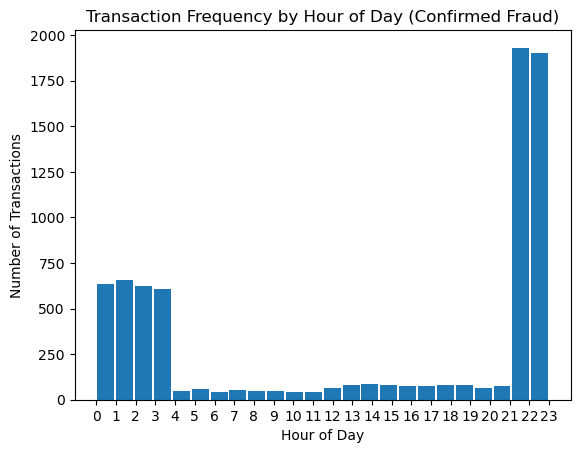

In [50]:
CreditCardFraud['trans_hour'] = CreditCardFraud['trans_date_trans_time'].dt.hour
FraudOnly_df = CreditCardFraud[CreditCardFraud['is_fraud'] == 1]

CreditCardFraud['trans_hour'].plot(kind='hist', bins=24, rwidth=0.9)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency by Hour of Day')
plt.xticks(range(0, 24))
plt.show()

FraudOnly_df['trans_hour'].plot(kind='hist', bins=24, rwidth=0.9)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency by Hour of Day (Confirmed Fraud)')
plt.xticks(range(0, 24))
plt.show()

### Bivariate Analysis

<Axes: title={'center': 'Correlation Matrix'}>

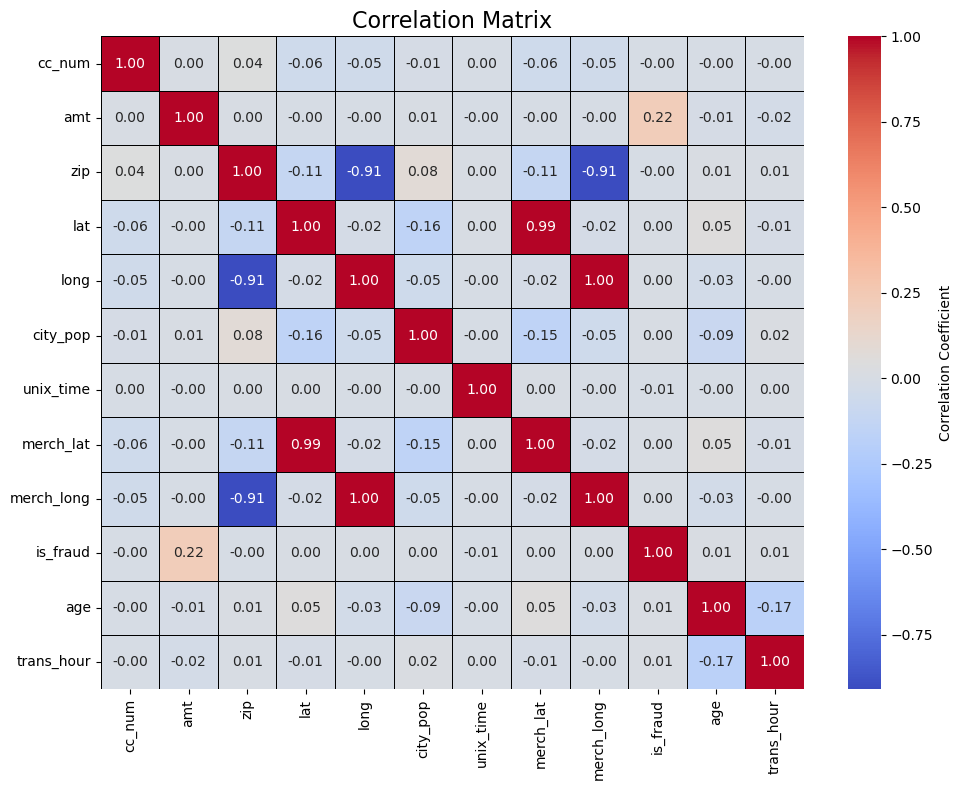

In [52]:
create_correlation_plot(CreditCardFraud)

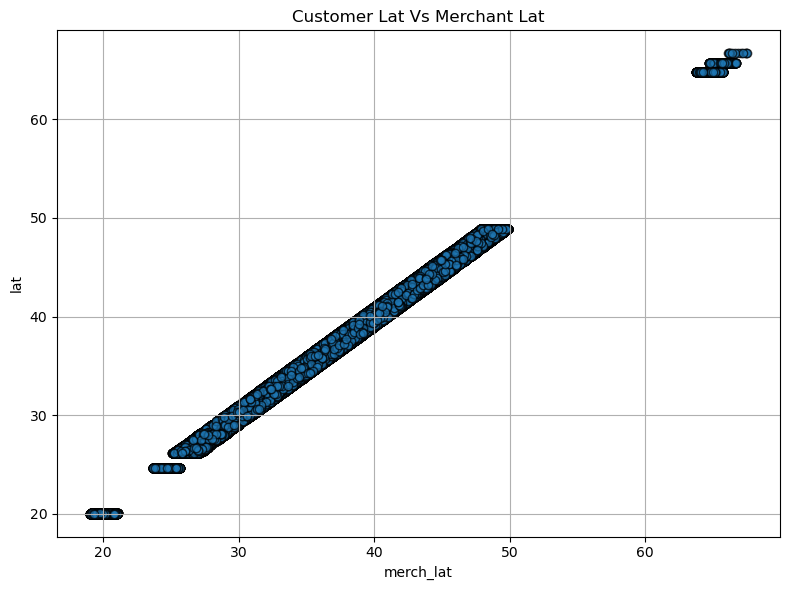

In [53]:
scatter_two_columns(CreditCardFraud, 'merch_lat', 'lat', title='Customer Lat Vs Merchant Lat')

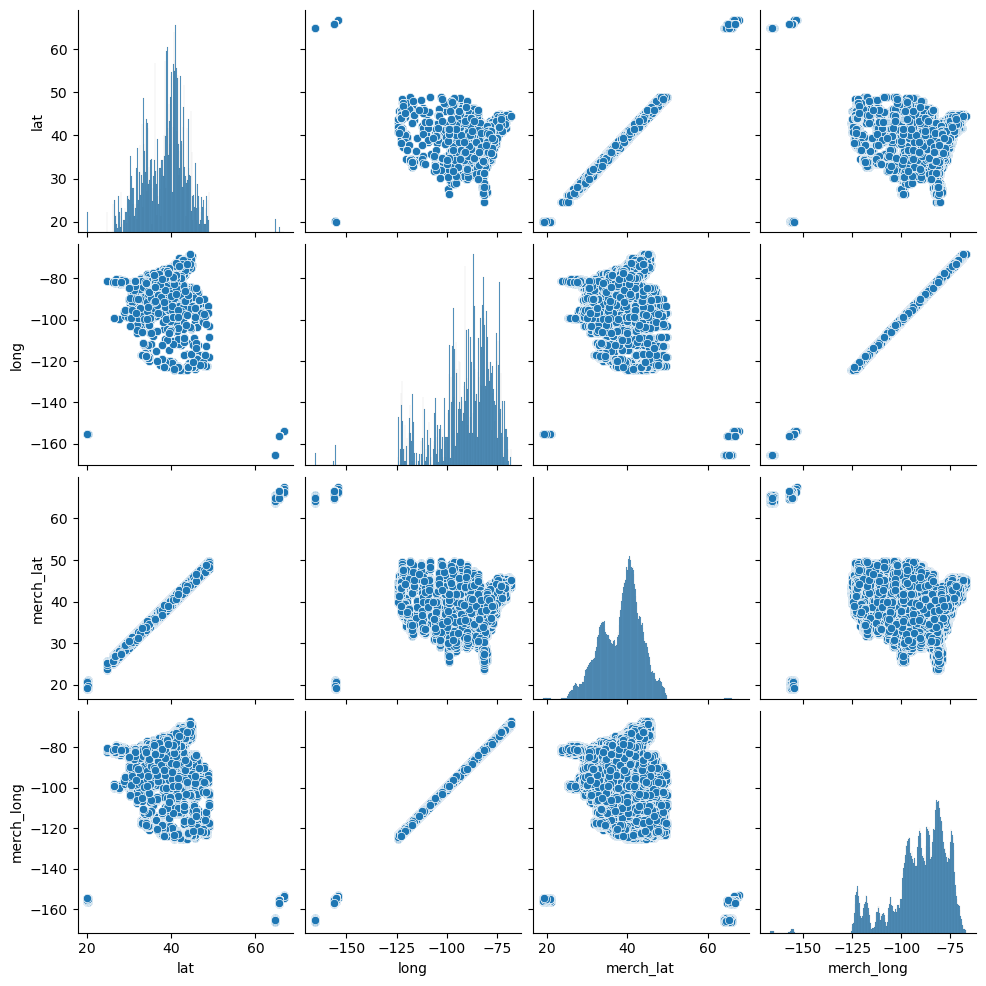

In [54]:
pairplot_selected_columns(CreditCardFraud, columns=['lat', 'long', 'merch_lat', 'merch_long'])

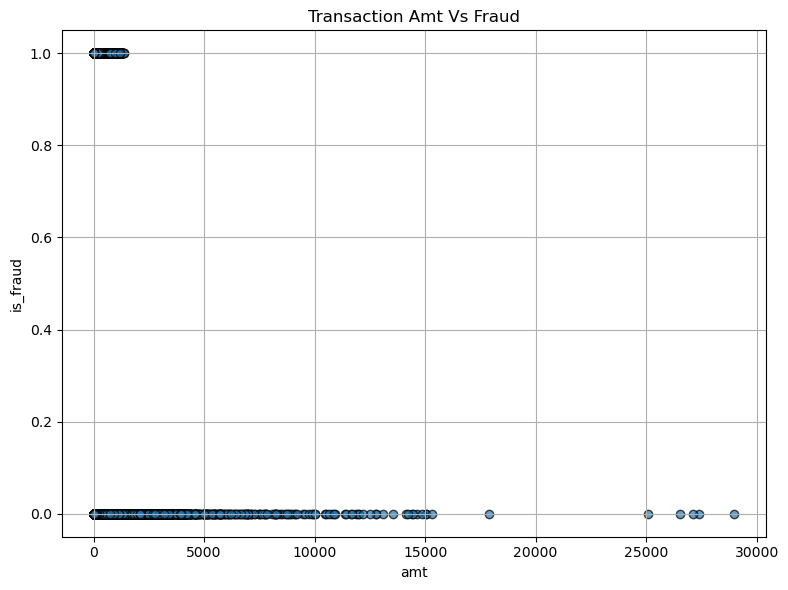

In [55]:
scatter_two_columns(CreditCardFraud, 'amt', 'is_fraud', title='Transaction Amt Vs Fraud')

## Credit Card Application Data

### Preprocessing

In [58]:
CreditCardApproval.sample(n=10, random_state=42)

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
13396       5089019          F                0             0               0   
5324        5036806          M                1             1               2   
13640       5089480          F                0             0               1   
5070        5036050          F                0             1               0   
17645       5112655          F                0             1               0   
20813       5125604          F                1             1               0   
21930       5135614          F                1             1               0   
18637       5114501          M                0             0               2   
19451       5116705          F                0             1               1   
23198       5142758          M                1             0               1   

       Total_Income                                        Income_Type  \
13396        135000  Working                                       ...   
5324         472500  Commercial associate                          ...   
13640         36000  Working                                       ...   
5070         225000  State servant                                 ...   
17645        112500  Working                                       ...   
20813        450000  Commercial associate                          ...   
21930        112500  Working                                       ...   
18637        180000  Working                                       ...   
19451        157500  Working                                       ...   
23198        337500  Commercial associate                          ...   

                                          Education_Type  \
13396  Secondary / secondary special                 ...   
5324   Higher education                              ...   
13640  Secondary / secondary special                 ...   
5070   Secondary / secondary special                 ...   
17645  Secondary / secondary special                 ...   
20813  Higher education                              ...   
21930  Secondary / secondary special                 ...   
18637  Secondary / secondary special                 ...   
19451  Lower secondary                               ...   
23198  Higher education                              ...   

                                           Family_Status  \
13396  Married                                       ...   
5324   Married                                       ...   
13640  Married                                       ...   
5070   Married                                       ...   
17645  Married                                       ...   
20813  Married                                       ...   
21930  Separated                                     ...   
18637  Married                                       ...   
19451  Widow                                         ...   
23198  Separated                                     ...   

                                            Housing_Type  ...  \
13396  House / apartment                             ...  ...   
5324   House / apartment                             ...  ...   
13640  Rented apartment                              ...  ...   
5070   With parents                                  ...  ...   
17645  House / apartment                             ...  ...   
20813  House / apartment                             ...  ...   
21930  House / apartment                             ...  ...   
18637  House / apartment                             ...  ...   
19451  House / apartment                             ...  ...   
23198  House / apartment                             ...  ...   

       Owned_Work_Phone  Owned_Phone  Owned_Email  \
13396                 1            0            0   
5324                  0            0            0   
13640                 1            0            0   
5070                  0            0            0 

In [59]:
CreditCardApproval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [60]:
CreditCardApproval = CreditCardApproval.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [61]:
CreditCardApproval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Applicant_ID          25128 non-null  int64   
 1   Applicant_Gender      25128 non-null  category
 2   Owned_Car             25128 non-null  int64   
 3   Owned_Realty          25128 non-null  int64   
 4   Total_Children        25128 non-null  int64   
 5   Total_Income          25128 non-null  int64   
 6   Income_Type           25128 non-null  category
 7   Education_Type        25128 non-null  category
 8   Family_Status         25128 non-null  category
 9   Housing_Type          25128 non-null  category
 10  Owned_Mobile_Phone    25128 non-null  int64   
 11  Owned_Work_Phone      25128 non-null  int64   
 12  Owned_Phone           25128 non-null  int64   
 13  Owned_Email           25128 non-null  int64   
 14  Job_Title             25128 non-null  category
 15  To

In [62]:
duplicate_rows(CreditCardApproval)

No duplicates found in the dataset


Empty DataFrame
Columns: [Applicant_ID, Applicant_Gender, Owned_Car, Owned_Realty, Total_Children, Total_Income, Income_Type, Education_Type, Family_Status, Housing_Type, Owned_Mobile_Phone, Owned_Work_Phone, Owned_Phone, Owned_Email, Job_Title, Total_Family_Members, Applicant_Age, Years_of_Working, Total_Bad_Debt, Total_Good_Debt, Status]
Index: []

[0 rows x 21 columns]

In [63]:
duplicate_ids = column_duplicates(CreditCardApproval, 'Applicant_ID')

No duplicate values found in column 'Applicant_ID'.


In [64]:
missing_null_vals(CreditCardApproval)

No missing values found in the DataFrame.


In [65]:
cols_to_encode = ["Applicant_Gender", "Income_Type", "Education_Type", "Family_Status", "Housing_Type", 'Job_Title']
CreditCardApprovalEncoded = one_hot_encoding(CreditCardApproval, cols_to_encode)

In [66]:
CreditCardApprovalEncoded.sample(n=5)

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
871         5010389          F                1             1               0   
12438       5078813          M                0             1               0   
12064       5069072          F                1             1               0   
11773       5068634          F                1             1               0   
12254       5069416          M                1             0               1   

       Total_Income                                        Income_Type  \
871          540000  Commercial associate                          ...   
12438        450000  Commercial associate                          ...   
12064        157500  State servant                                 ...   
11773        216000  Working                                       ...   
12254        225000  Working                                       ...   

                                          Education_Type  \
871    Higher education                              ...   
12438  Higher education                              ...   
12064  Secondary / secondary special                 ...   
11773  Secondary / secondary special                 ...   
12254  Secondary / secondary special                 ...   

                                           Family_Status  \
871    Married                                       ...   
12438  Married                                       ...   
12064  Married                                       ...   
11773  Married                                       ...   
12254  Married                                       ...   

                                            Housing_Type  ...  \
871    House / apartment                             ...  ...   
12438  House / apartment                             ...  ...   
12064  House / apartment                             ...  ...   
11773  House / apartment                             ...  ...   
12254  House / apartment                             ...  ...   

       Laborers                                            \
871                                                    0    
12438                                                  0    
12064                                                  0    
11773                                                  0    
12254                                                  0    

       Low-skill Laborers                                  \
871                                                    0    
12438                                                  0    
12064                                                  0    
11773                                                  0    
12254                                                  0    

       Managers                                            \
871                                                    1    
12438                                                  1    
12064                                                  0    
11773                                                  1    
12254                                                  0    

       Medicine staff                                      \
871                                                    0    
12438                                                  0    
12064                                                  0    
11773                                                  0    
12254                                                  0    

      Private service staff                               \
871                                                    0   
12438                                                  0   
12064                                                  0   
11773                                                  0   
12254                                                  0   

       Realty agents                                       \
871                                                    0    
12438      

### Univariate Analysis

In [68]:
desc = CreditCardApproval[['Total_Children', 'Total_Income', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt']].describe()
desc.map(lambda x: '{:.2f}'.format(x))

Total_Children Total_Income Applicant_Age Years_of_Working  \
count       25128.00     25128.00      25128.00         25128.00   
mean            0.51    194836.50         41.00             7.69   
std             0.76    104521.12          9.55             6.42   
min             0.00     27000.00         21.00             1.00   
25%             0.00    135000.00         33.00             3.00   
50%             0.00    180000.00         40.00             6.00   
75%             1.00    225000.00         48.00            10.00   
max             5.00   1575000.00         68.00            44.00   

      Total_Bad_Debt Total_Good_Debt  
count       25128.00        25128.00  
mean            0.33           21.06  
std             1.57           14.74  
min             0.00            1.00  
25%             0.00            9.00  
50%             0.00           18.00  
75%             0.00           31.00  
max            49.00           61.00

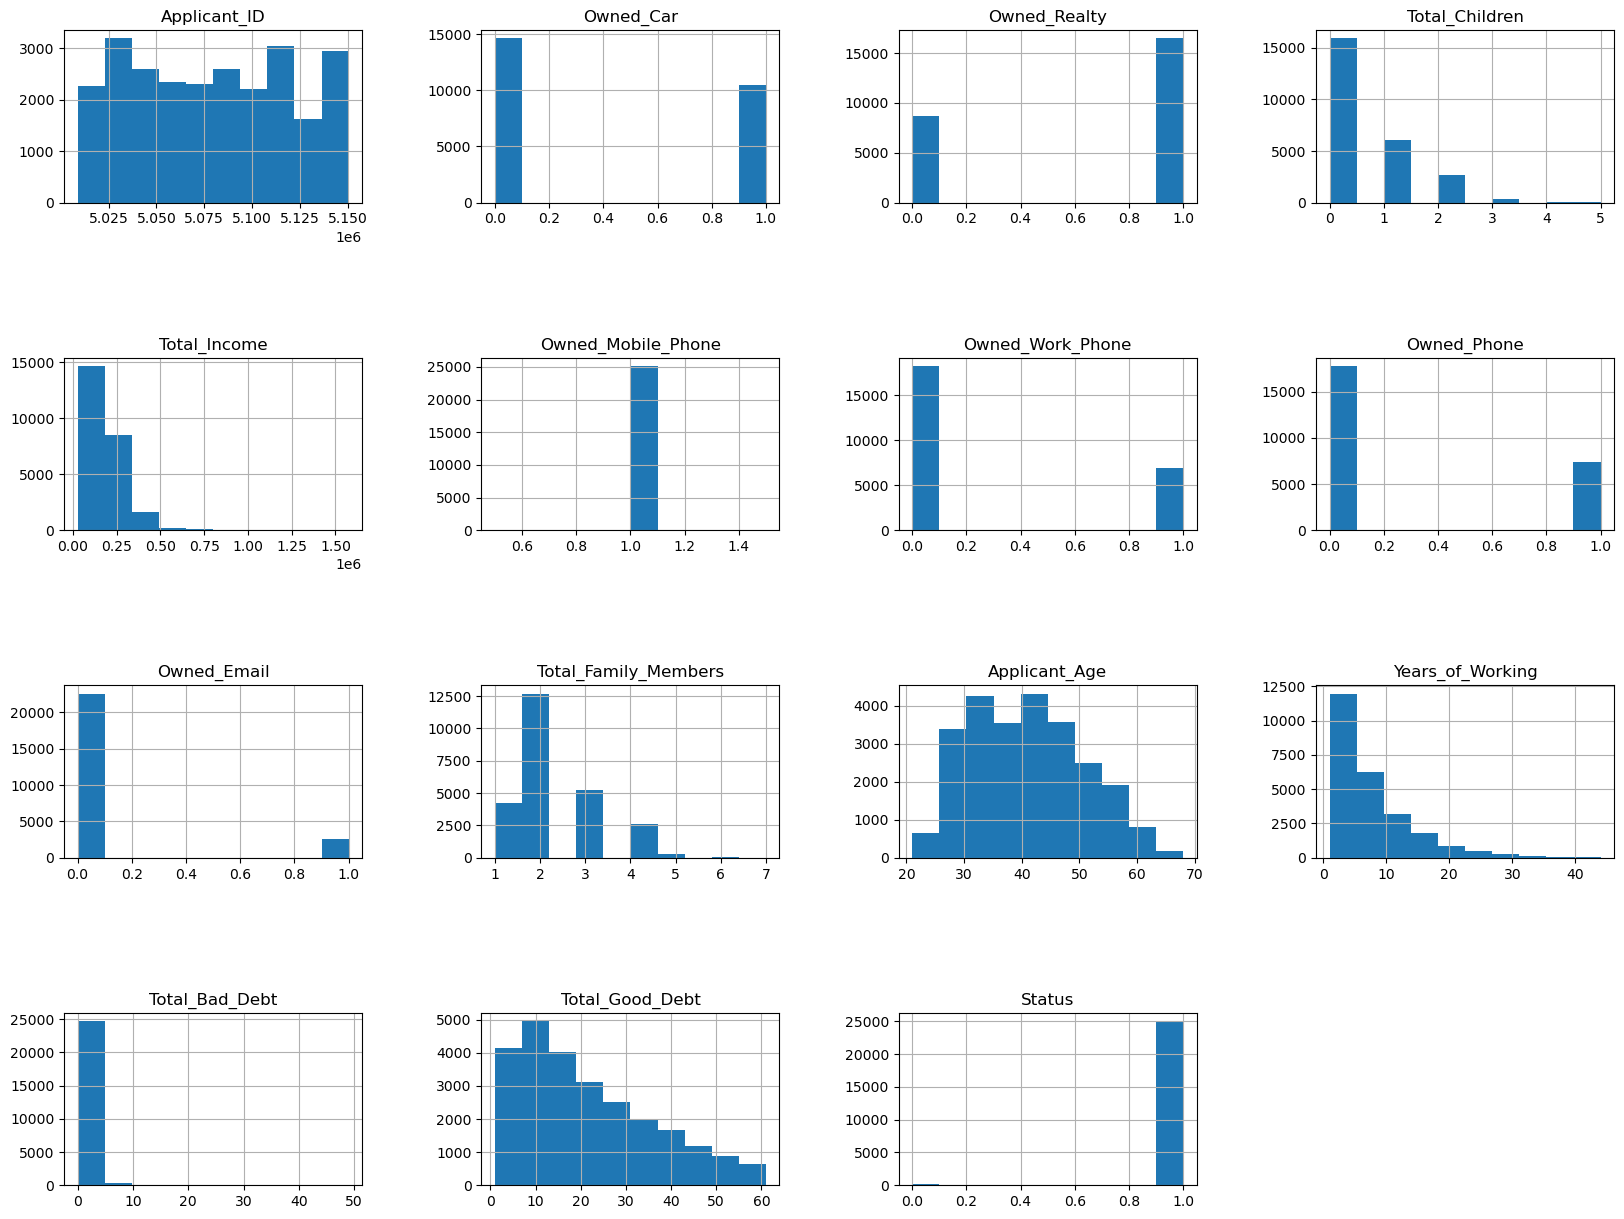

In [69]:
CreditCardApproval.hist(figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.9)

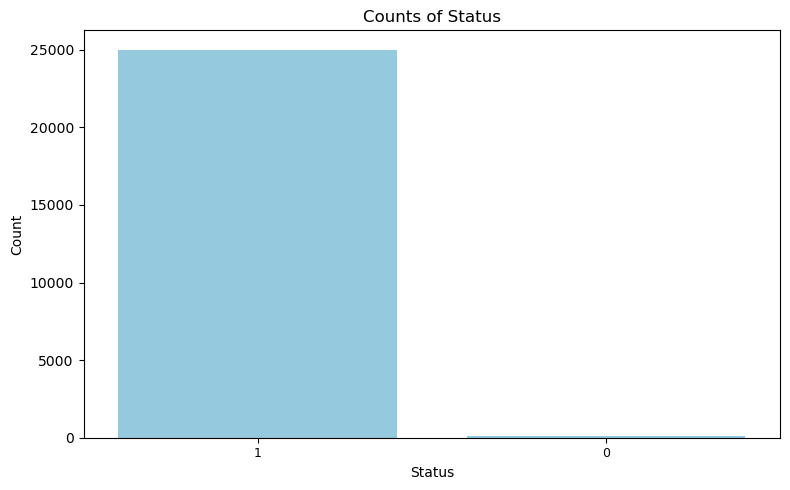

Status
1    25007
0      121
Name: count, dtype: int64

In [70]:
categorical_bar_plots(CreditCardApproval, 'Status', 'skyblue', 0)
get_counts(CreditCardApproval['Status'])

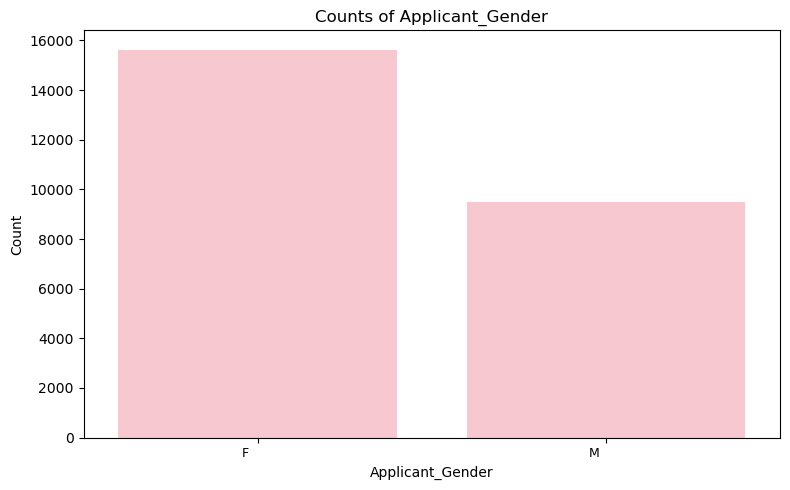

In [71]:
categorical_bar_plots(CreditCardApproval, 'Applicant_Gender', 'pink', 0)

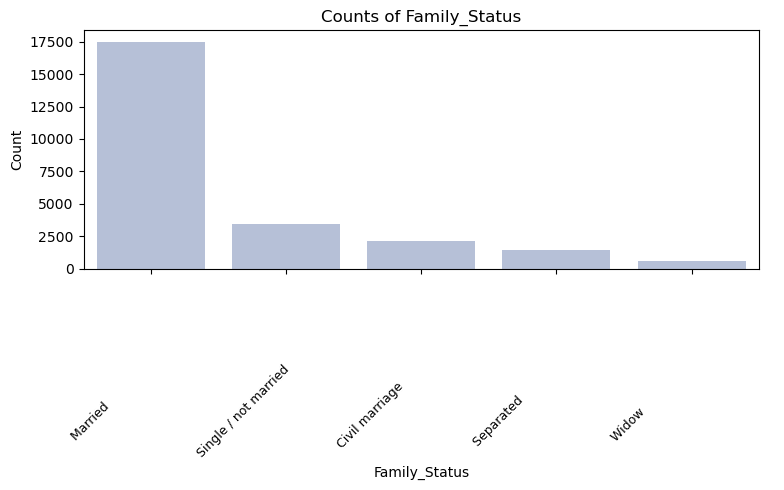

In [72]:
categorical_bar_plots(CreditCardApproval, 'Family_Status', '#b0bedc', 45)

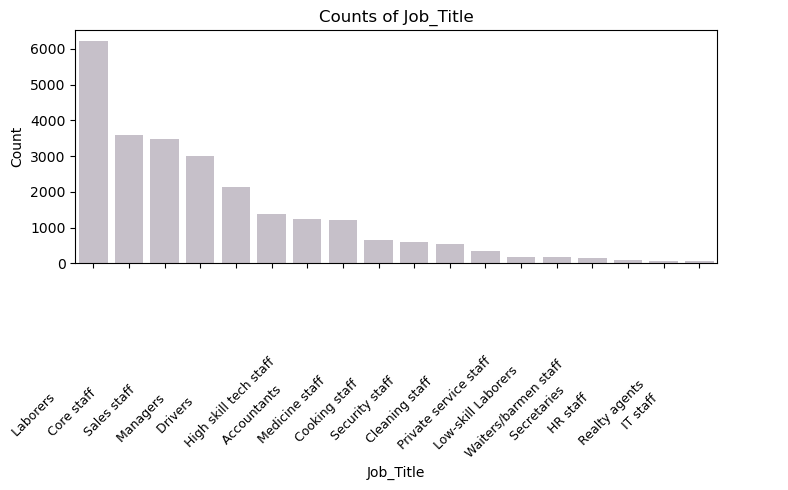

In [73]:
categorical_bar_plots(CreditCardApproval, 'Job_Title', '#c7bfca', 45)

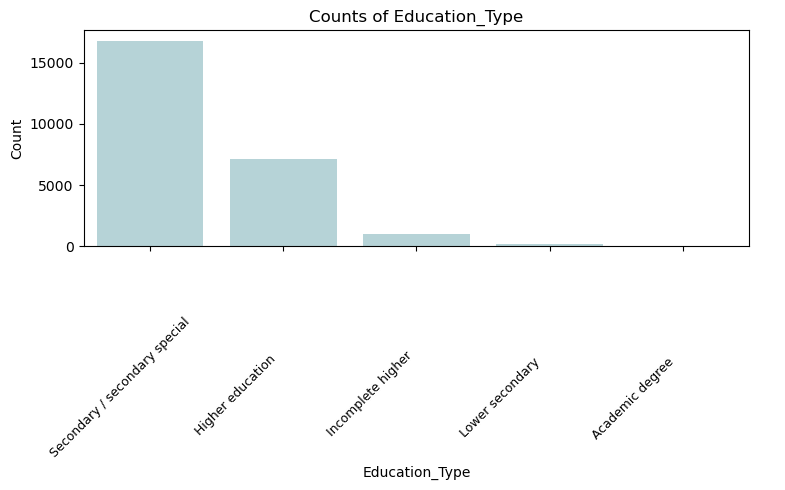

In [74]:
categorical_bar_plots(CreditCardApproval, 'Education_Type', '#b0d7dc', 45)

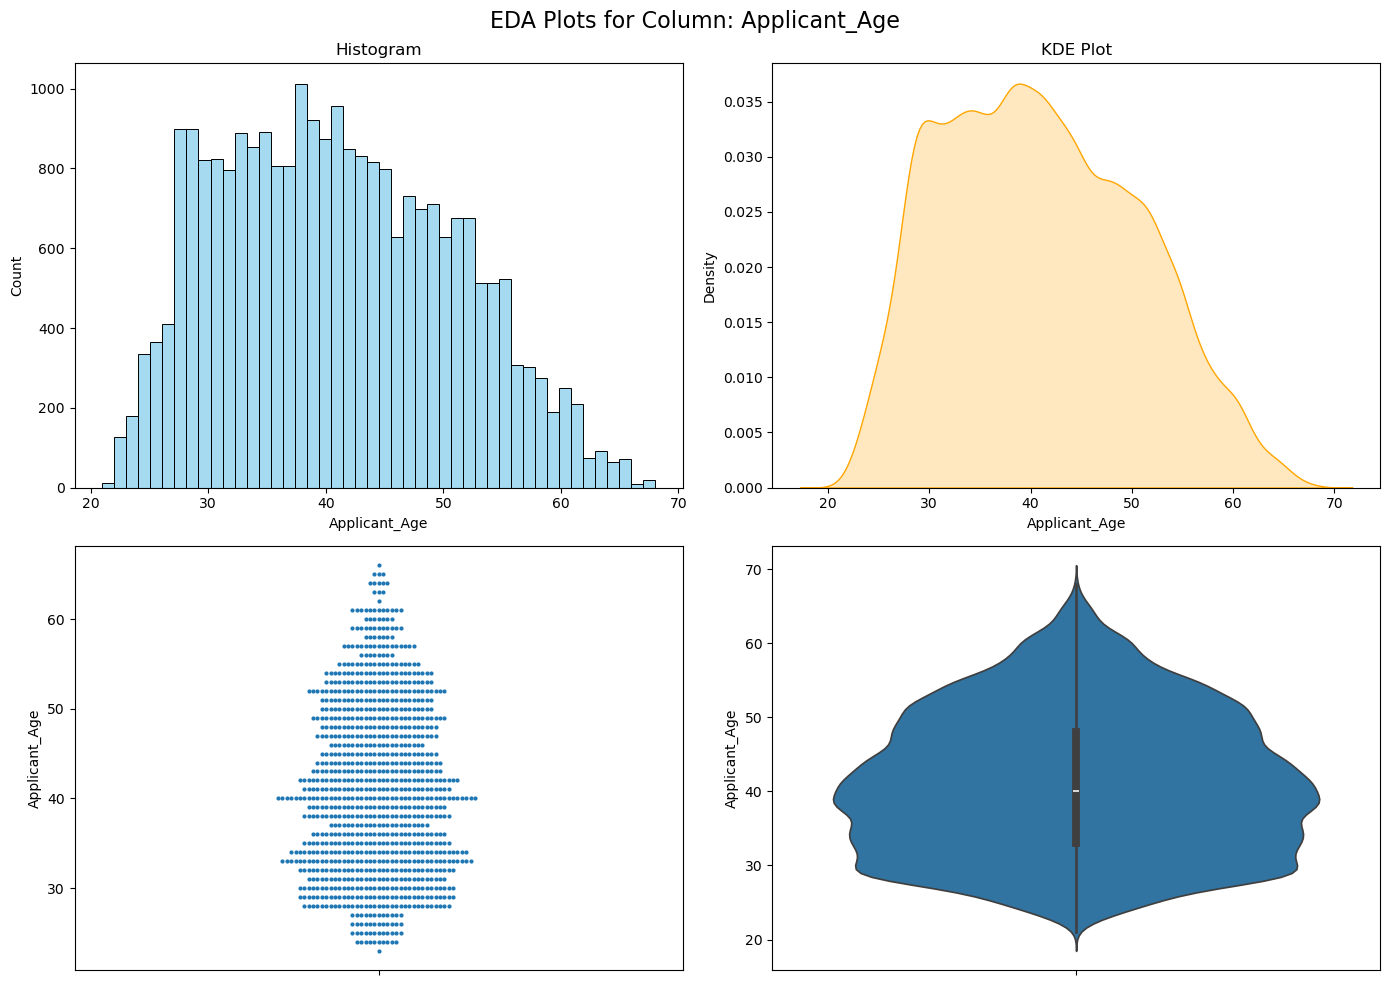

In [75]:
distribution_plots(CreditCardApproval, 'Applicant_Age')

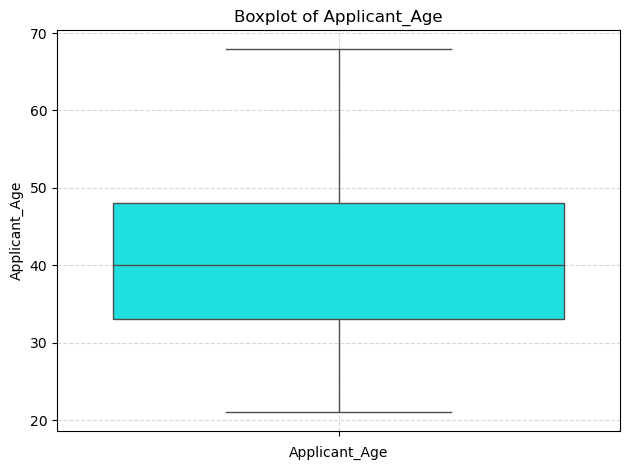

Applicant_Age Mean: 40.995503024514484
Applicant_Age Median: 40.0
Applicant_Age Mode: [38]




In [76]:
box_plot(CreditCardApproval, 'Applicant_Age')
col_summary_stastistics(CreditCardApproval, 'Applicant_Age')

Histogram minimum: 27000.0
Histogram maximum: 1575000.0


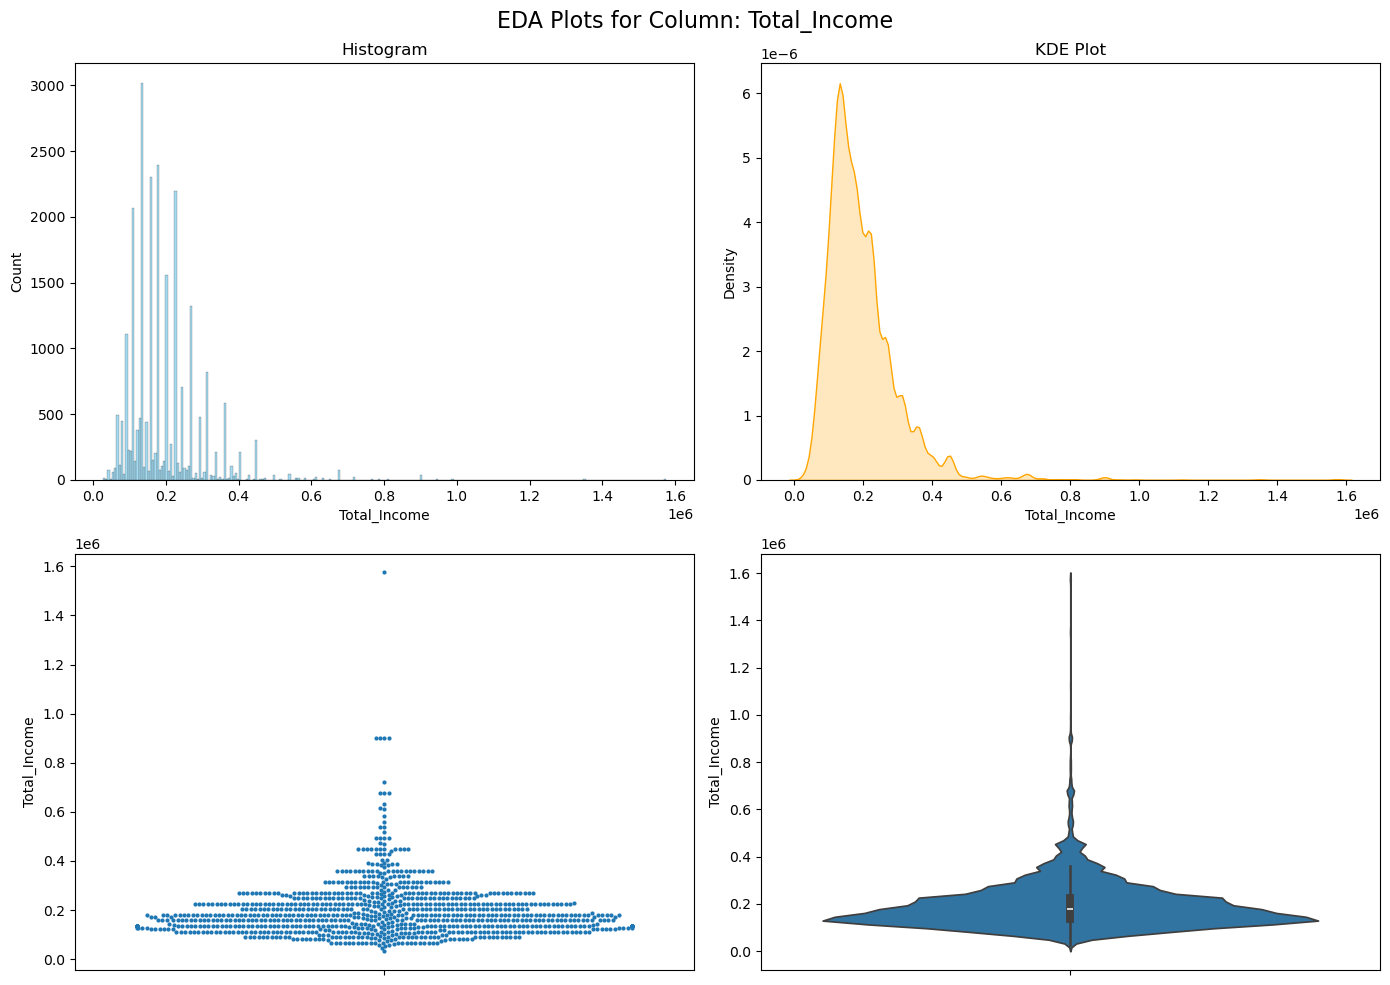

In [77]:
get_hist_min_max(CreditCardApproval, 'Total_Income', 'auto')
distribution_plots(CreditCardApproval, 'Total_Income')

<Axes: xlabel='Total_Income', ylabel='Count'>

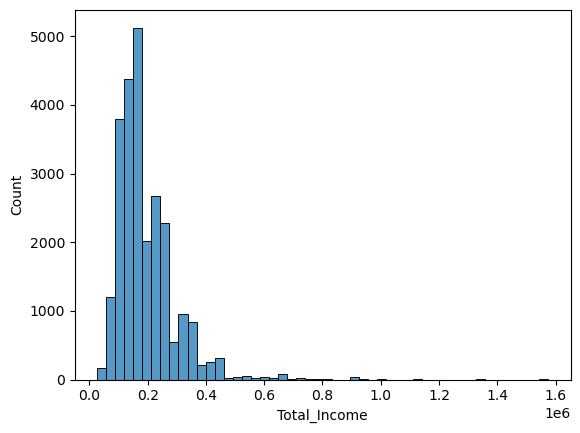

In [78]:
sns.histplot(CreditCardApproval['Total_Income'], bins=50)

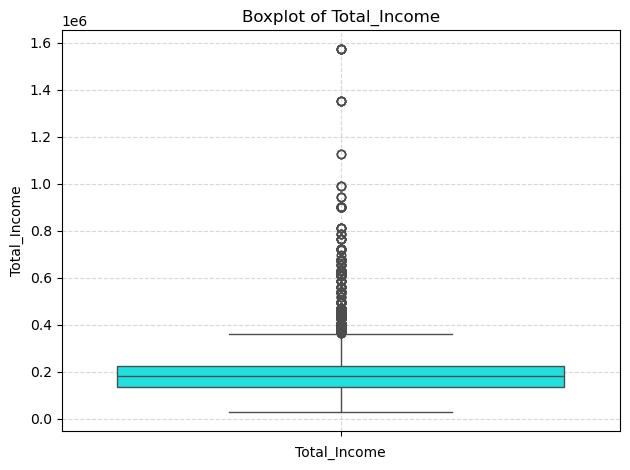

Boxplot Upper Bound: 360000.0
Total_Income Mean: 194836.49856733525
Total_Income Median: 180000.0
Total_Income Mode: [135000]




In [79]:
box_plot(CreditCardApproval, 'Total_Income')
q1 = CreditCardApproval['Total_Income'].quantile(0.25)
q3 = CreditCardApproval['Total_Income'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")
col_summary_stastistics(CreditCardApproval, 'Total_Income')

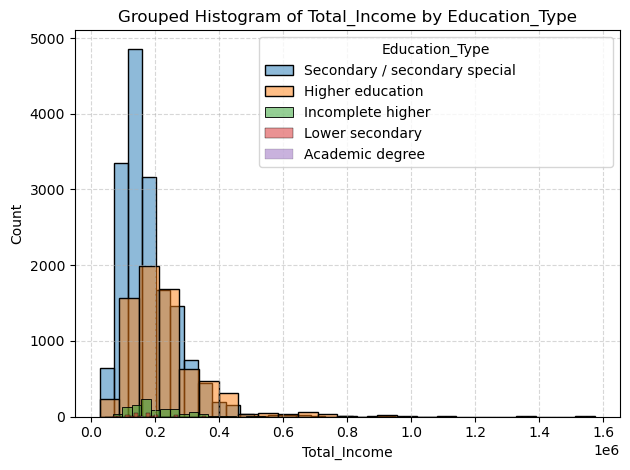

In [80]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Education_Type', 25)

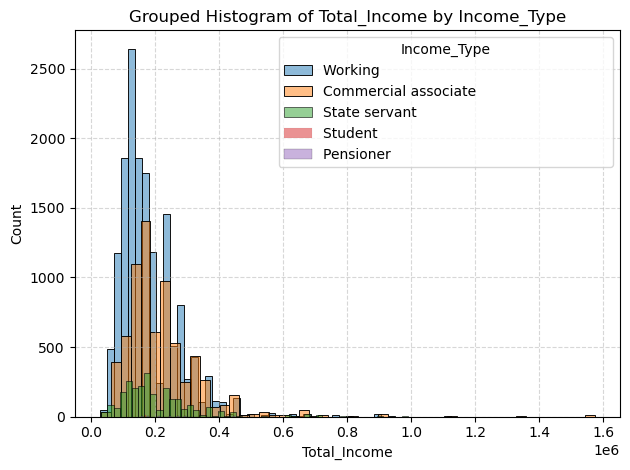

In [81]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Income_Type', 50)

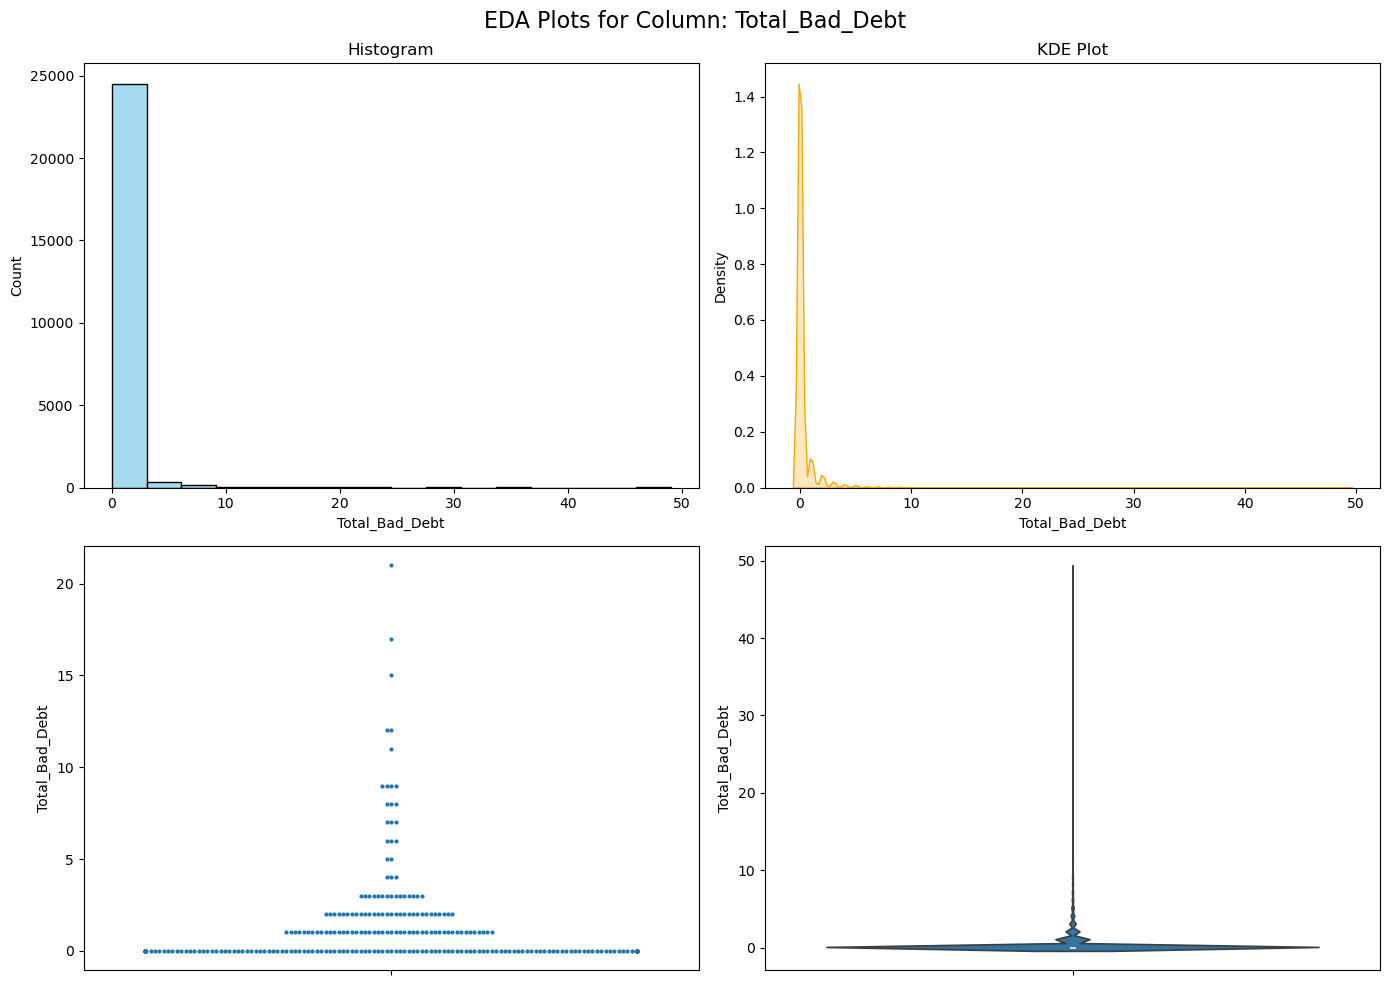

In [82]:
distribution_plots(CreditCardApproval, 'Total_Bad_Debt')

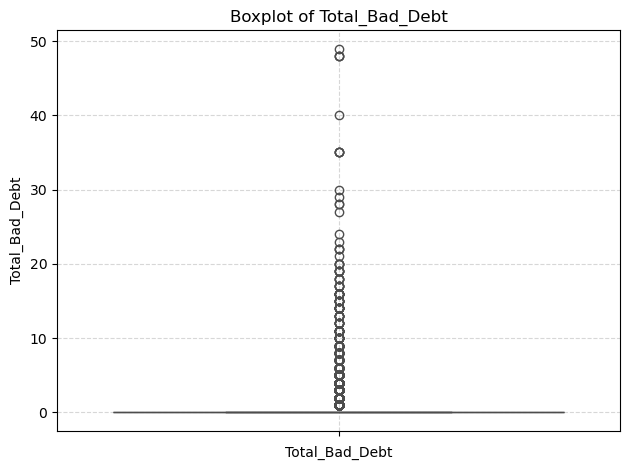

In [83]:
box_plot(CreditCardApproval, 'Total_Bad_Debt')

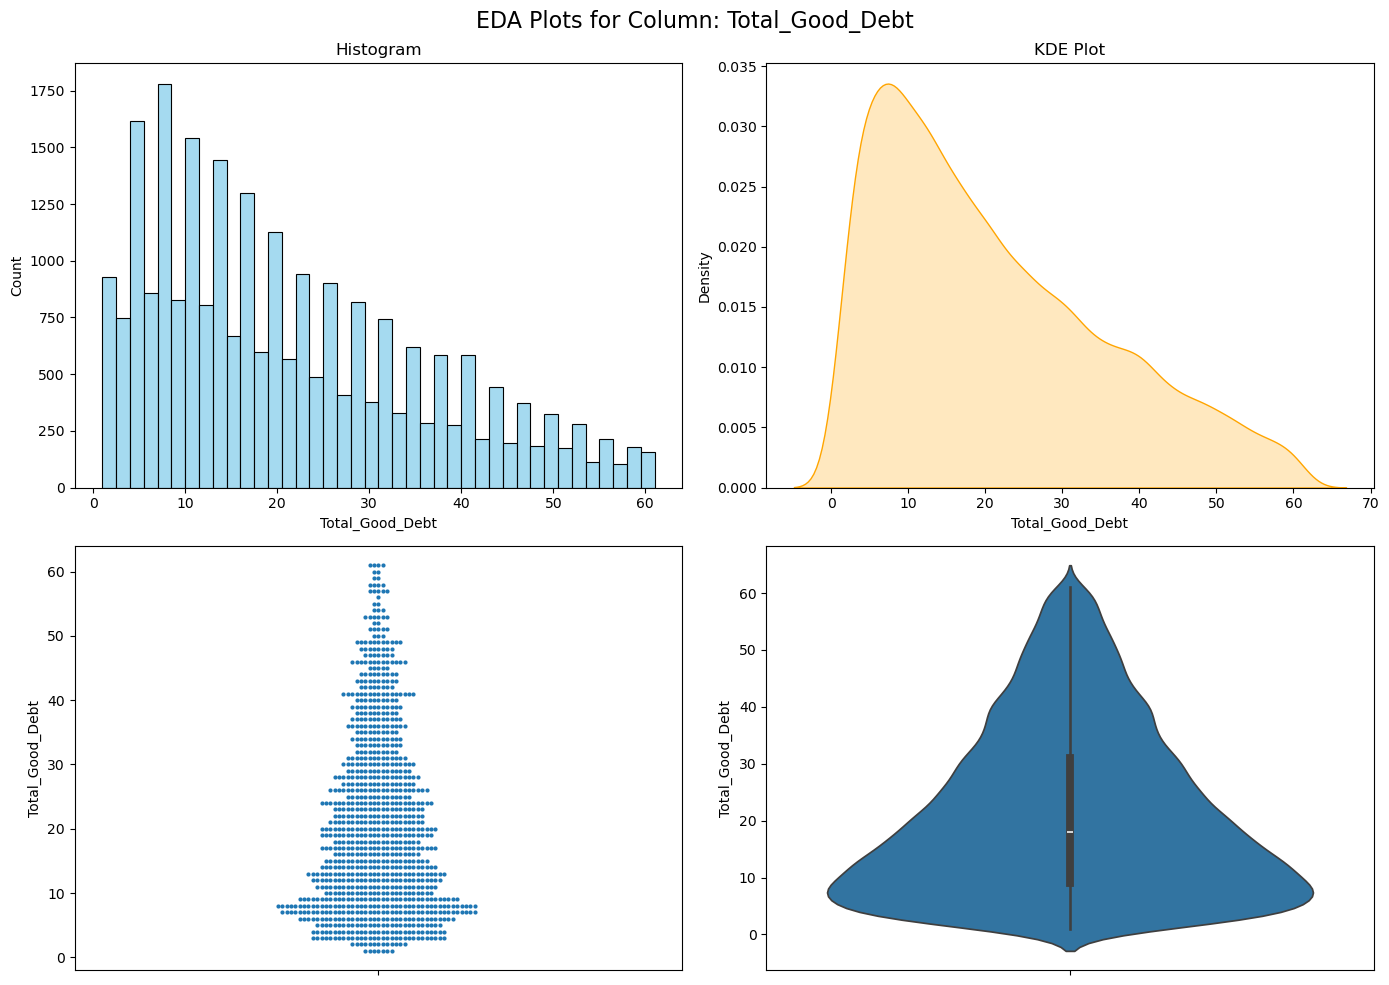

In [84]:
distribution_plots(CreditCardApproval, 'Total_Good_Debt')

### Bivariate Analysis

<Axes: title={'center': 'Correlation Matrix'}>

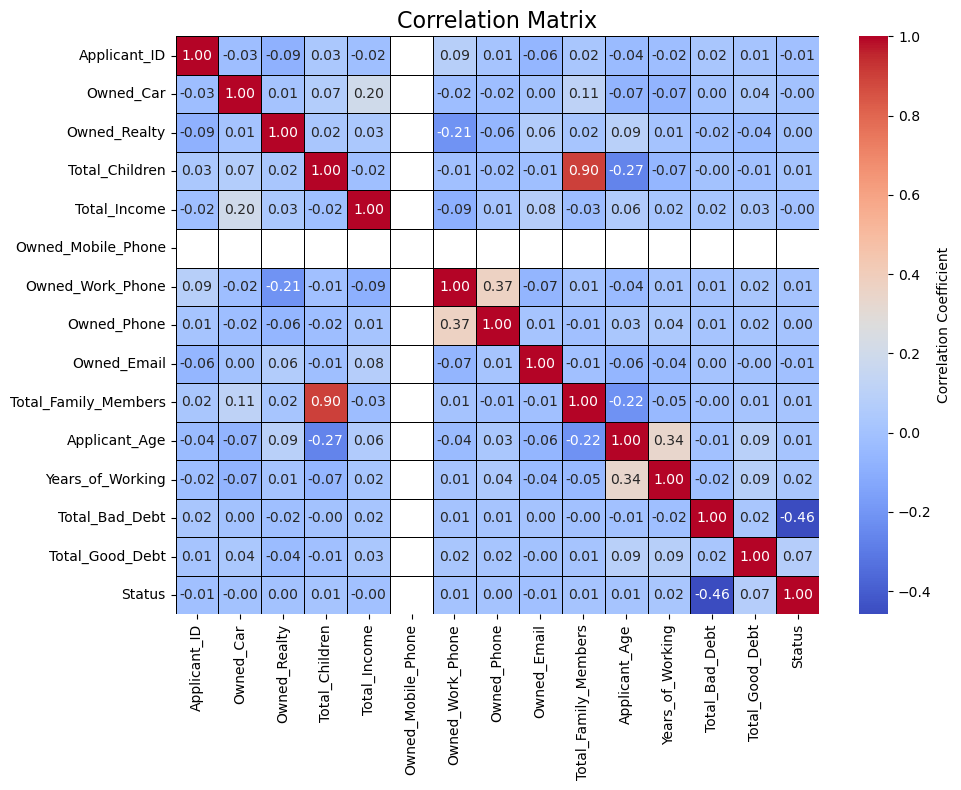

In [86]:
create_correlation_plot(CreditCardApproval)

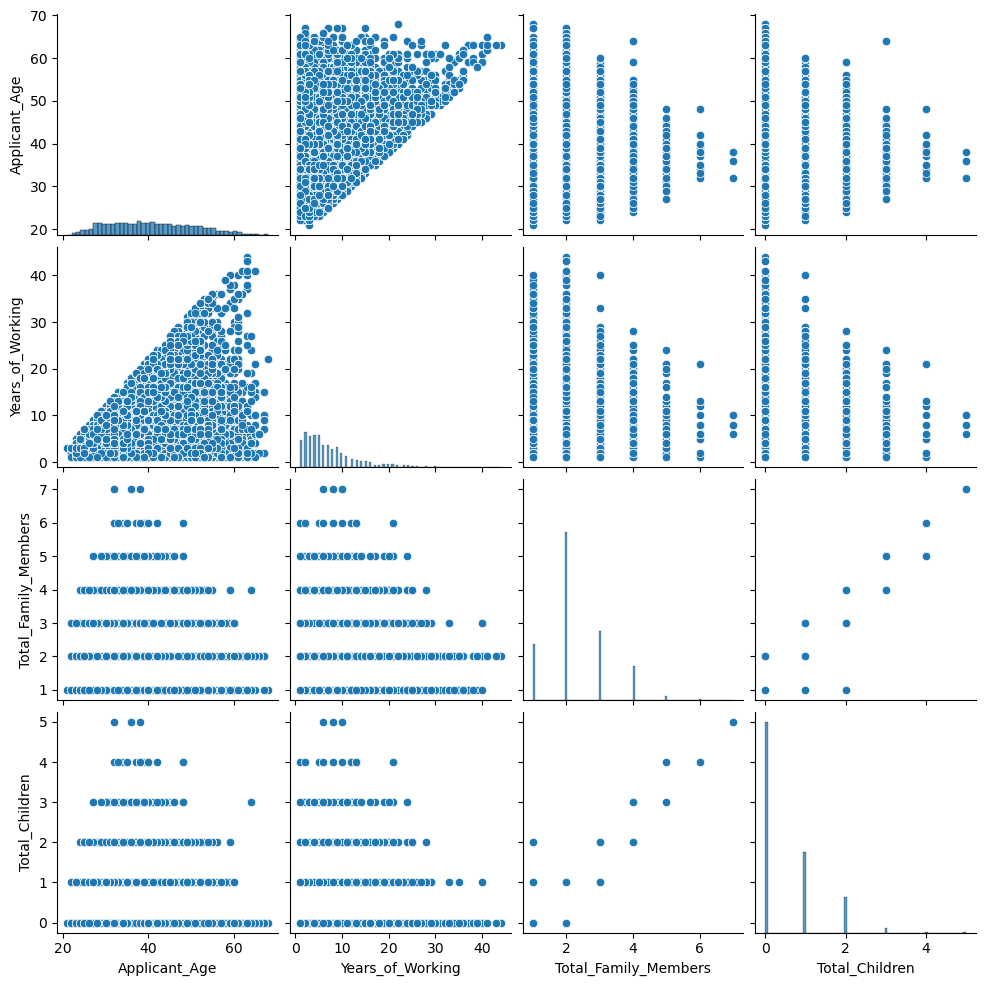

In [87]:
pairplot_selected_columns(CreditCardApproval, columns=['Applicant_Age', 'Years_of_Working', 'Total_Family_Members', 'Total_Children'])

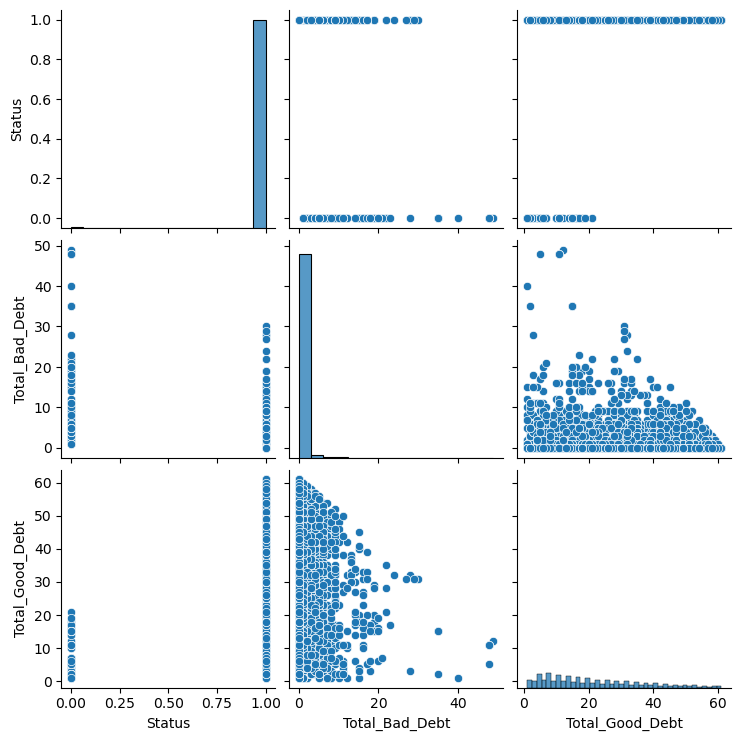

In [88]:
pairplot_selected_columns(CreditCardApproval, columns=['Status', 'Total_Bad_Debt', 'Total_Good_Debt',])

## Loan Default Data

### Preprocessing

In [91]:
LoanDefaultPrediction.sample(n=10, random_state=42)

ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
7777   118723   4132857      IV       9yrs        Not Vfied       70400.00   
13022   51132   6507401      IV       3yrs  Source Verified       52800.00   
64861  101456    793725     III       4yrs            Vfied       79200.00   
44991   84109   6799586      II     >10yrs            Vfied      114400.00   
74548   50824   6842865       V       1yrs  Source Verified      114400.00   
65978   45313   7128648     III       4yrs            Vfied      124960.00   
46288   77159   1528999       V     >10yrs        Not Vfied      142560.00   
21921  104824   1753184       I       4yrs  Source Verified       35200.00   
80193   29462   7125994       I       6yrs  Source Verified      132000.00   
87458  135554   7212998      II       5yrs  Source Verified      510398.24   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
7777     MORTGAGE               0                  0   
13022        RENT               0                  0   
64861    MORTGAGE               2                  0   
44991    MORTGAGE               1                  0   
74548    MORTGAGE               0                  0   
65978        RENT               0                  0   
46288    MORTGAGE               0                  0   
21921        RENT               0                  0   
80193    MORTGAGE               0                  0   
87458         OWN               0                  0   

                               Designation  ...  File_Status    State  \
7777                     Asst. Branch Mgr.  ...   fully paid       WI   
13022                       911 DISPATCHER  ...        whole       TX   
64861  Healthcare Therapy Services/Oaklawn  ...        whole       KY   
44991                   Operations Analyst  ...   fully paid  Florida   
74548                     insurance broker  ...   fully paid       PA   
65978        Sr. Portfolio Control Analyst  ...        whole       PA   
46288            Police Officer Lieutenant  ...        whole  Newyork   
21921                                 Deli  ...        whole     Ohio   
80193               Maintenance Supervisor  ...        whole       ME   
87458                            President  ...        whole       KS   

       Account_Open  Total_Unpaid_CL  Duration  Unpaid_Amount  \
7777              7         13031.00   3 years        4440.87   
13022             8         32702.00   5 years       23351.76   
64861            14         66234.00   3 years       49150.53   
44991             6          5976.00   3 years        4314.33   
74548            12         74202.00   5 years       66652.38   
65978            11         27224.00   3 years       27466.02   
46288             7              NaN   5 years       73003.32   
21921            18         46148.00   3 years        5749.02   
80193            14         61254.00   3 years       19528.20   
87458            21        105859.86   3 years       67934.88   

                    Reason  Claim_Type  Due_Fee  Default  
7777   debt  consolidation           I      0.0        0  
13022         credit  card           I      0.0        0  
64861  debt  consolidation           I      0.0        0  
44991    home  improvement           I      0.0        0  
74548  debt  consolidation           I      0.0        0  
65978         credit  card           I      0.0        0  
46288    home  improvement           I      0.0        1  
21921         credit  card           I      0.0        0  
80193  debt  consolidation           I      0.0        0  
87458         credit  card           I      0.0        0  

[10 rows x 30 columns]

In [92]:
LoanDefaultPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [93]:
LoanDefaultPrediction = LoanDefaultPrediction.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [94]:
LoanDefaultPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   87500 non-null  int64   
 1   Asst_Reg             87500 non-null  int64   
 2   GGGrade              87500 non-null  category
 3   Experience           87500 non-null  category
 4   Validation           87500 non-null  category
 5   Yearly_Income        81925 non-null  float64 
 6   Home_Status          87500 non-null  category
 7   Unpaid_2_years       87500 non-null  int64   
 8   Already_Defaulted    87500 non-null  int64   
 9   Designation          86086 non-null  category
 10  Debt_to_Income       84011 non-null  float64 
 11  Postal_Code          86111 non-null  float64 
 12  Lend_Amount          87500 non-null  float64 
 13  Deprecatory_Records  87500 non-null  int64   
 14  Interest_Charged     87500 non-null  float64 
 15  Usage_Rate         

In [95]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==129828]

ID  Asst_Reg GGGrade Experience Validation  Yearly_Income  \
60069  129828   1754260      IV     >10yrs  Not Vfied            NaN   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
60069    MORTGAGE               2                  0   

                              Designation  ...  File_Status  State  \
60069  Vice President, Employee Relations  ...        whole     NC   

       Account_Open  Total_Unpaid_CL  Duration  Unpaid_Amount  \
60069             8          32536.0   5 years       29943.81   

                    Reason  Claim_Type  Due_Fee  Default  
60069  debt  consolidation           I      0.0        0  

[1 rows x 30 columns]

In [96]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==77159]

ID  Asst_Reg GGGrade Experience Validation  Yearly_Income  \
46288  77159   1528999       V     >10yrs  Not Vfied       142560.0   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
46288    MORTGAGE               0                  0   

                     Designation  ...  File_Status    State  Account_Open  \
46288  Police Officer Lieutenant  ...        whole  Newyork             7   

       Total_Unpaid_CL  Duration  Unpaid_Amount             Reason  \
46288              NaN   5 years       73003.32  home  improvement   

       Claim_Type  Due_Fee  Default  
46288           I      0.0        1  

[1 rows x 30 columns]

In [97]:
missing_null_vals(LoanDefaultPrediction)

Missing values found in the following columns:

Yearly_Income      5575
Designation        1414
Debt_to_Income     3489
Postal_Code        1389
Total_Unpaid_CL    4186
Unpaid_Amount      4852
dtype: int64


In [98]:
LoanDefaultPrediction = impute_missing_values(LoanDefaultPrediction)

In [99]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==129828]

ID  Asst_Reg GGGrade Experience Validation  Yearly_Income  \
60069  129828   1754260      IV     >10yrs  Not Vfied   134859.62978   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
60069    MORTGAGE               2                  0   

                              Designation  ...  File_Status  State  \
60069  Vice President, Employee Relations  ...        whole     NC   

       Account_Open  Total_Unpaid_CL  Duration  Unpaid_Amount  \
60069             8          32536.0   5 years       29943.81   

                    Reason  Claim_Type  Due_Fee  Default  
60069  debt  consolidation           I      0.0        0  

[1 rows x 30 columns]

In [100]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==77159]

ID  Asst_Reg GGGrade Experience Validation  Yearly_Income  \
46288  77159   1528999       V     >10yrs  Not Vfied       142560.0   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
46288    MORTGAGE               0                  0   

                     Designation  ...  File_Status    State  Account_Open  \
46288  Police Officer Lieutenant  ...        whole  Newyork             7   

       Total_Unpaid_CL  Duration  Unpaid_Amount             Reason  \
46288     53268.640394   5 years       73003.32  home  improvement   

       Claim_Type  Due_Fee  Default  
46288           I      0.0        1  

[1 rows x 30 columns]

In [101]:
missing_null_vals(LoanDefaultPrediction)

No missing values found in the DataFrame.


In [102]:
states = get_counts(LoanDefaultPrediction['State'])
states

State
California    12625
Newyork        7210
TX             7130
Florida        5813
IL             3502
NewJersey      3253
PA             3169
Ohio           2969
GA             2924
VA             2545
NC             2520
MI             2253
Maryland       2073
AZ             2058
MA             2025
CO             1882
WA             1860
MN             1673
IN             1433
MO             1410
TN             1361
CT             1325
NV             1172
AL             1140
WI             1116
OR             1050
LA             1019
SC             1005
KY              821
KS              819
OK              766
AR              650
UT              639
NM              497
HI              465
NH              427
MS              410
WV              388
RI              372
MT              259
DE              238
DC              235
AK              221
WY              186
SD              181
VT              178
NE              134
ND               50
ME               49
Name: count, d

In [103]:
mapper = {
    'California' : 'CA',
    'Newyork' : 'NY',
    'Florida' : 'FL',
    'NewJersey' : 'NJ',
    'Ohio' : 'OH',
    'Maryland' : 'MD'
}

state_to_map = LoanDefaultPrediction['State']
mapped_states = []
for state in state_to_map:
    if state in mapper:
        mapped_states.append(mapper[state])
    else:
        mapped_states.append(state)

LoanDefaultPrediction['State'] = mapped_states

In [104]:
states = get_counts(LoanDefaultPrediction['State'])
states

State
CA    12625
NY     7210
TX     7130
FL     5813
IL     3502
NJ     3253
PA     3169
OH     2969
GA     2924
VA     2545
NC     2520
MI     2253
MD     2073
AZ     2058
MA     2025
CO     1882
WA     1860
MN     1673
IN     1433
MO     1410
TN     1361
CT     1325
NV     1172
AL     1140
WI     1116
OR     1050
LA     1019
SC     1005
KY      821
KS      819
OK      766
AR      650
UT      639
NM      497
HI      465
NH      427
MS      410
WV      388
RI      372
MT      259
DE      238
DC      235
AK      221
WY      186
SD      181
VT      178
NE      134
ND       50
ME       49
Name: count, dtype: int64

In [105]:
duplicate_rows(LoanDefaultPrediction)

No duplicates found in the dataset


Empty DataFrame
Columns: [ID, Asst_Reg, GGGrade, Experience, Validation, Yearly_Income, Home_Status, Unpaid_2_years, Already_Defaulted, Designation, Debt_to_Income, Postal_Code, Lend_Amount, Deprecatory_Records, Interest_Charged, Usage_Rate, Inquiries, Present_Balance, Gross_Collection, Sub_GGGrade, File_Status, State, Account_Open, Total_Unpaid_CL, Duration, Unpaid_Amount, Reason, Claim_Type, Due_Fee, Default]
Index: []

[0 rows x 30 columns]

In [106]:
duplicate_ids = column_duplicates(LoanDefaultPrediction, 'ID')

No duplicate values found in column 'ID'.


In [107]:
cols_to_encode = ["GGGrade", "Experience", "Validation", "Home_Status", "File_Status","State","Reason","Claim_Type"]
LoanDefaultPredictionEncoded = one_hot_encoding(LoanDefaultPrediction, cols_to_encode)

In [108]:
LoanDefaultPredictionEncoded.sample(n=5)

ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
45021  124003   6846907      II     >10yrs        Not Vfied       137280.0   
15071   42592   3754745     III       5yrs  Source Verified       137280.0   
36095  107662   6424288     III       3yrs        Not Vfied        88000.0   
48687  124719    793830      II       4yrs        Not Vfied        88000.0   
22300   89218   2638725     III       1yrs            Vfied       176000.0   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
45021        RENT               0                  0   
15071        RENT               0                  0   
36095        RENT               1                  0   
48687    MORTGAGE               0                  0   
22300    MORTGAGE               0                  0   

                    Designation  ...  house  major  purchase  medical  moving  \
45021  Assistant Vice President  ...      0                0        0       0   
15071               Coordinator  ...      0                0        0       0   
36095          Business Manager  ...      0                0        0       0   
48687         US Postal Service  ...      0                0        0       0   
22300            School Teacher  ...      0                0        0       0   

       other  small  business  vacation  wedding  I  J  
45021      0                0         0        0  1  0  
15071      0                0         0        0  1  0  
36095      0                0         0        0  1  0  
48687      0                0         0        0  1  0  
22300      0                0         0        0  1  0  

[5 rows x 122 columns]

### Univariate Analysis

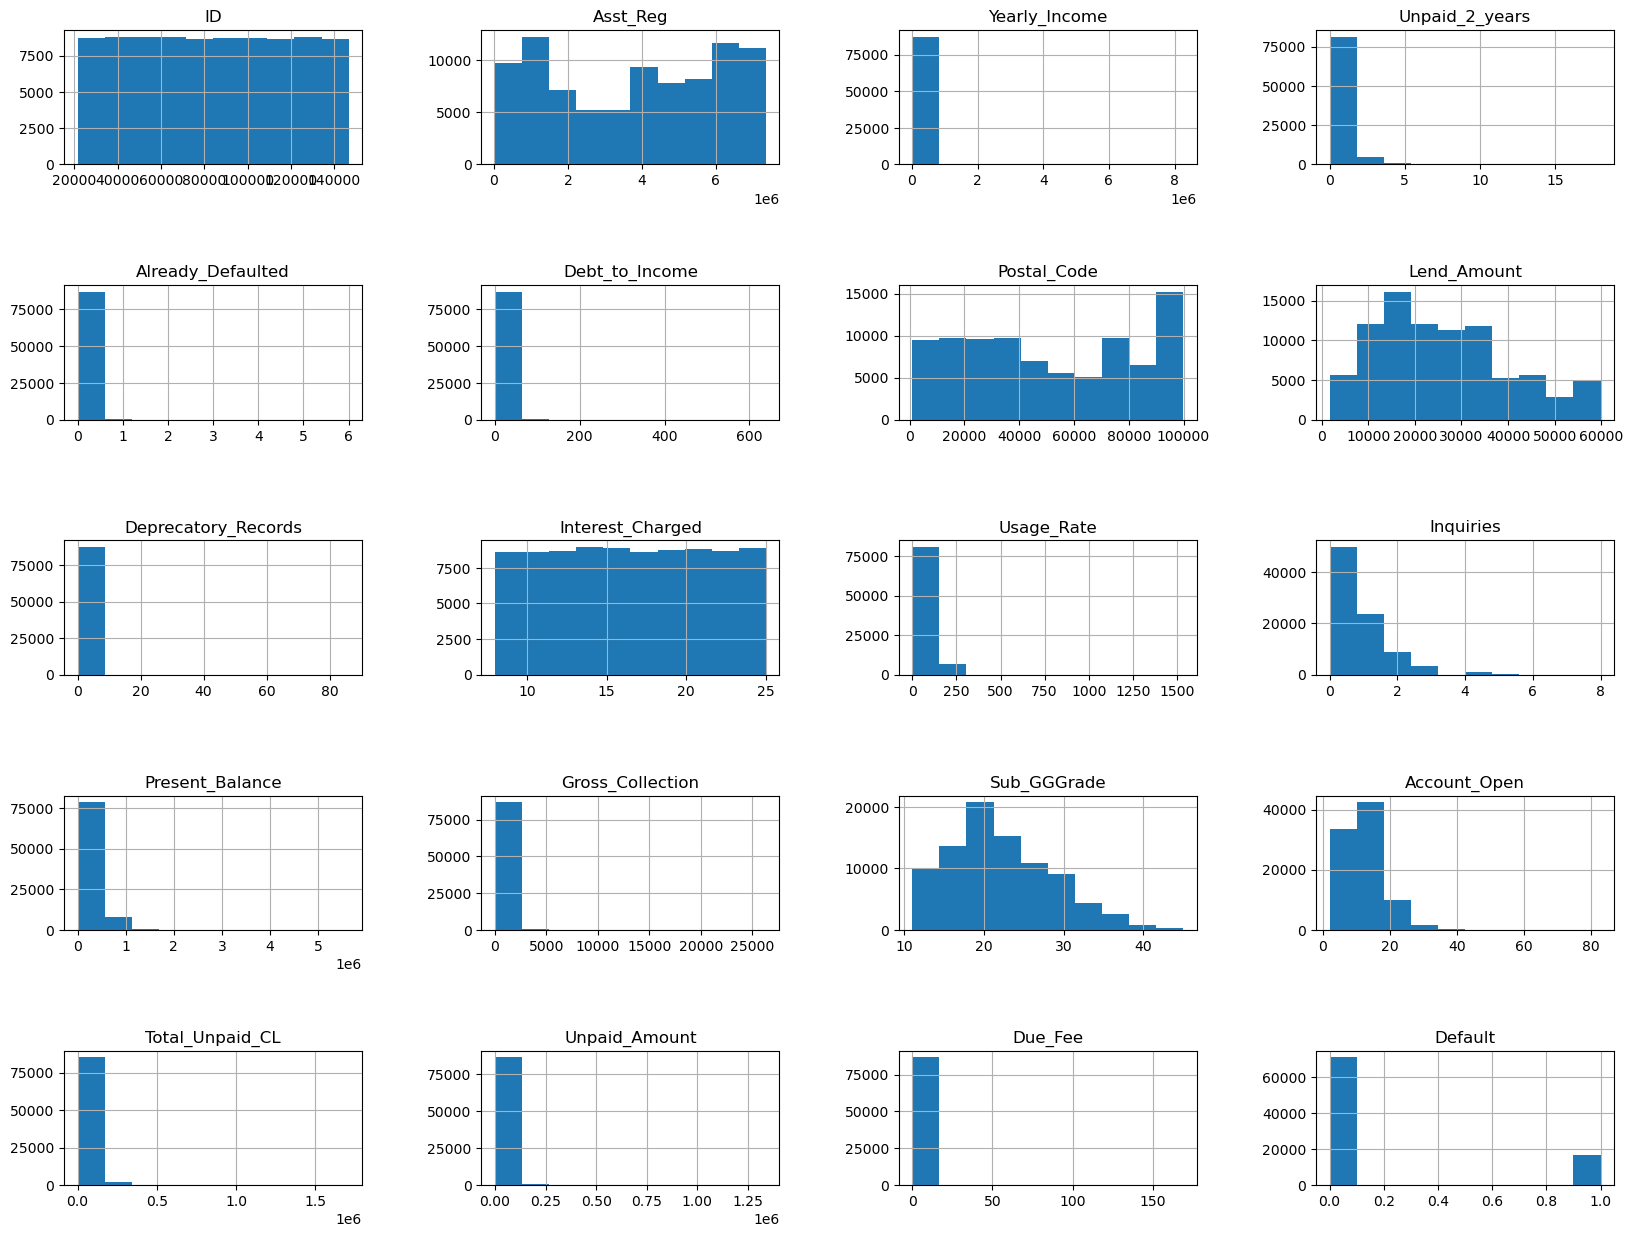

In [110]:
LoanDefaultPrediction.hist(figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.9)

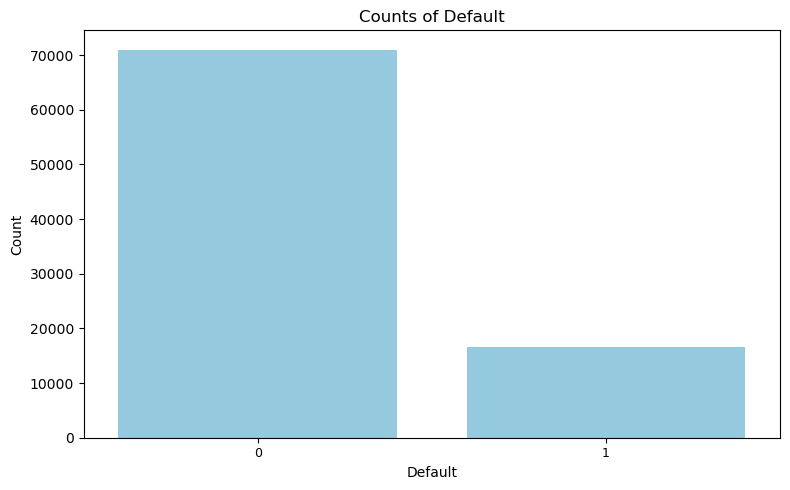

Default
0    70988
1    16512
Name: count, dtype: int64

In [111]:
categorical_bar_plots(LoanDefaultPrediction, 'Default', 'skyblue', 0)
get_counts(LoanDefaultPrediction['Default'])

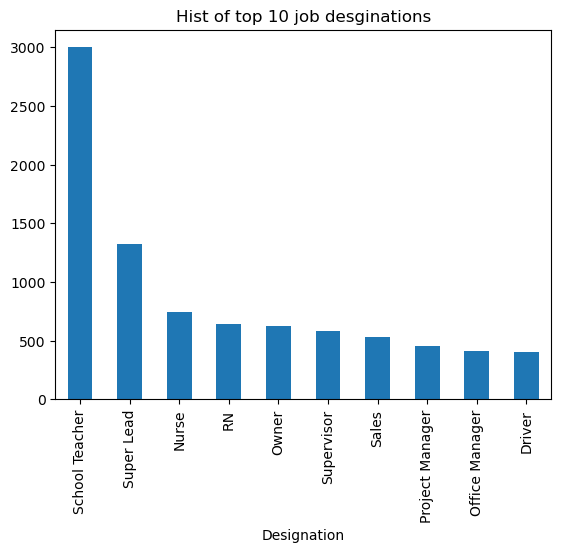

In [112]:
top_10_jobs = get_top_n_categories(LoanDefaultPrediction, 'Designation', 10)
top_10_jobs.plot(kind='bar')
plt.title('Hist of top 10 job desginations')
plt.show()

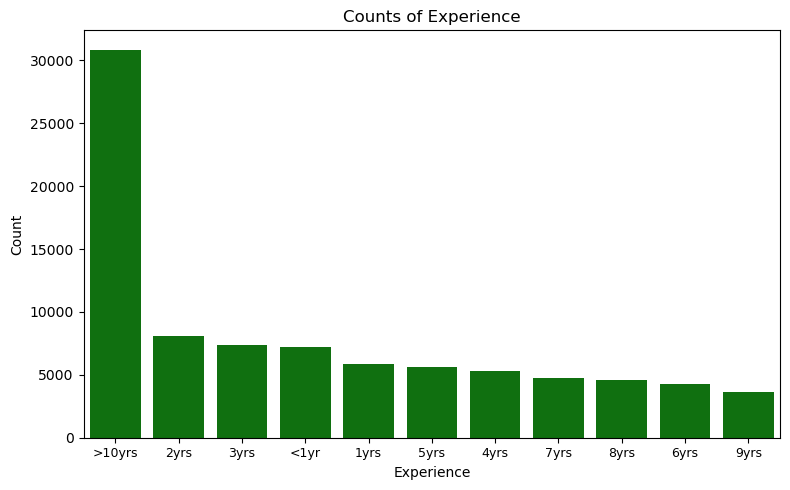

In [113]:
categorical_bar_plots(LoanDefaultPrediction, 'Experience', 'green', 0)

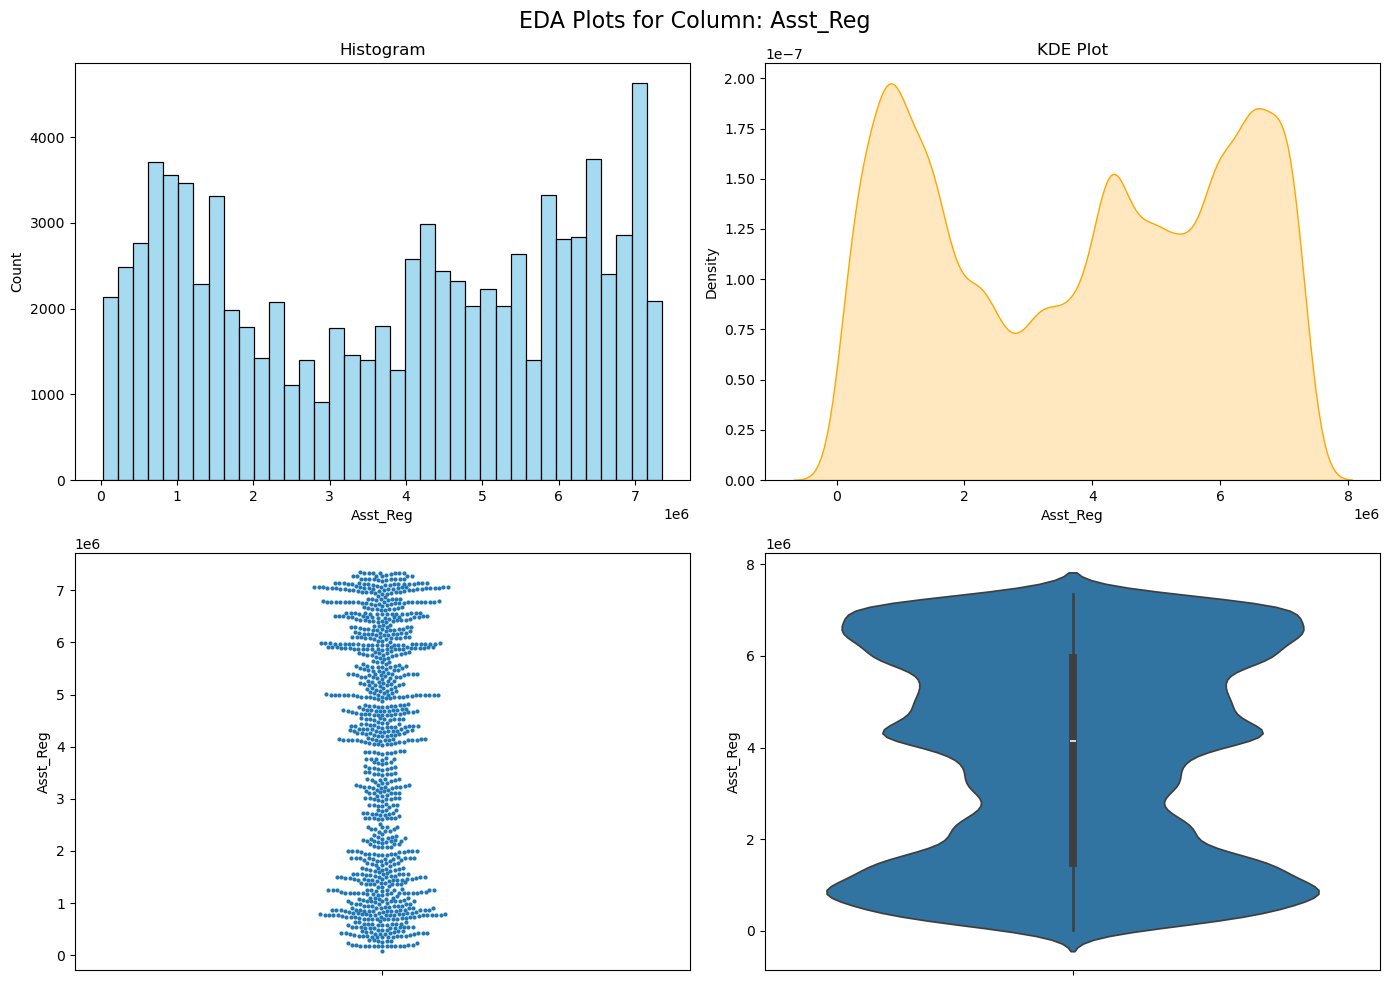

Histogram minimum: 24847.0
Histogram maximum: 7351847.0


In [114]:
distribution_plots(LoanDefaultPrediction, 'Asst_Reg')
get_hist_min_max(LoanDefaultPrediction, 'Asst_Reg', 'auto')

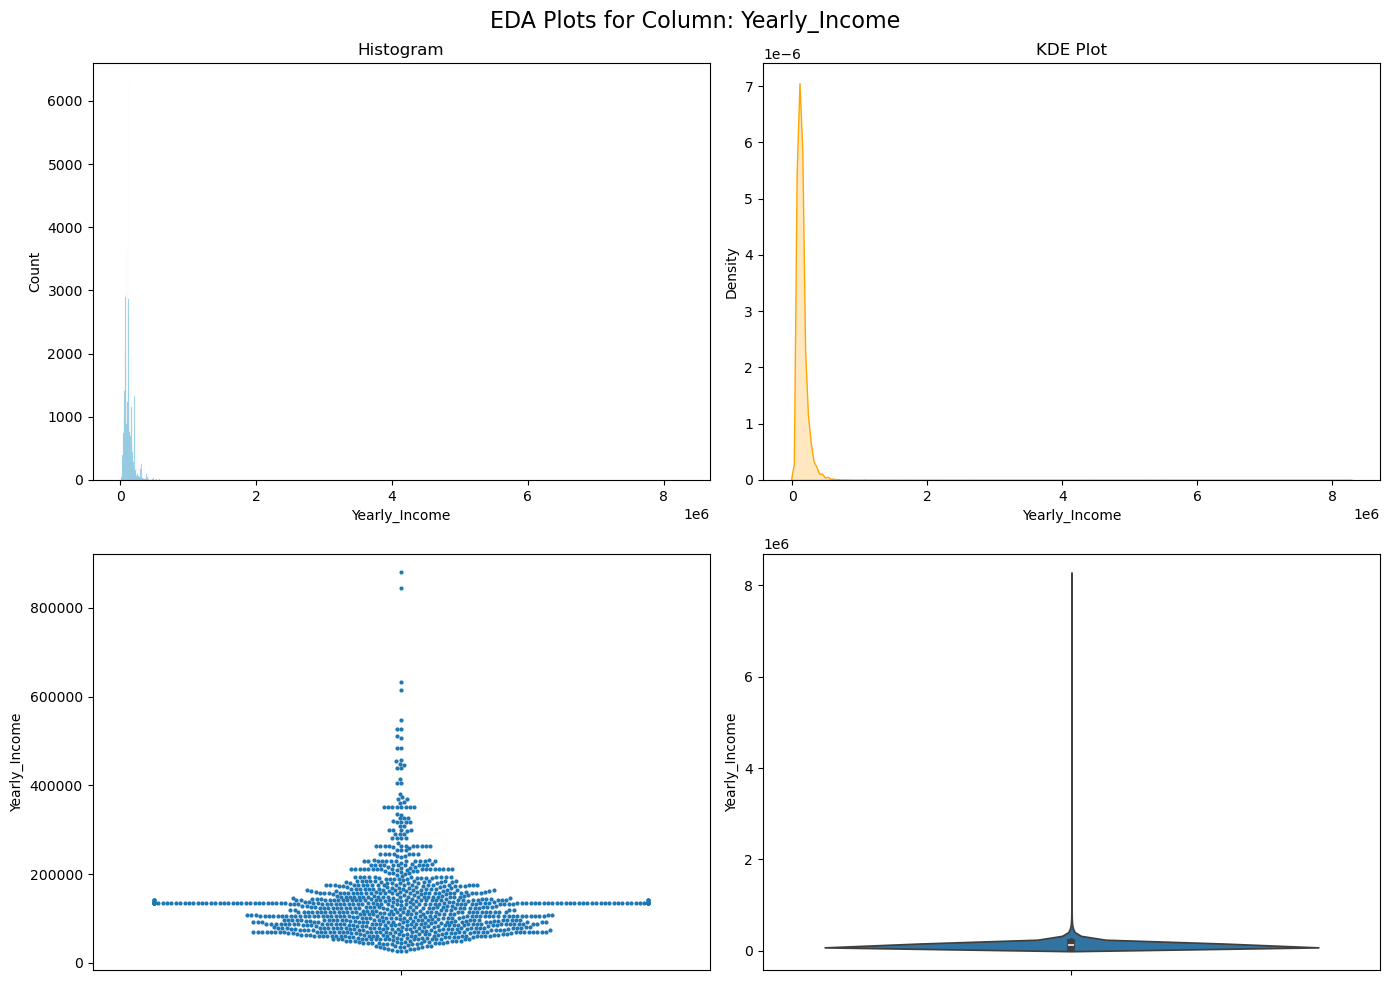

Histogram minimum: 8800.0
Histogram maximum: 8264030.72


In [115]:
distribution_plots(LoanDefaultPrediction, 'Yearly_Income')
get_hist_min_max(LoanDefaultPrediction, 'Yearly_Income', 'auto')

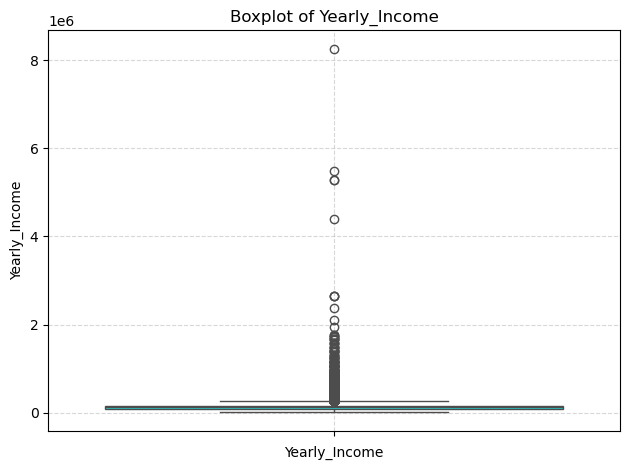

Boxplot Upper Bound: 266640.0
Yearly_Income Mean: 134859.62977978395
Yearly_Income Median: 121440.0
Yearly_Income Mode: [134859.62977978395]




In [116]:
box_plot(LoanDefaultPrediction, 'Yearly_Income')
q1 = LoanDefaultPrediction['Yearly_Income'].quantile(0.25)
q3 = LoanDefaultPrediction['Yearly_Income'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")
col_summary_stastistics(LoanDefaultPrediction, 'Yearly_Income')

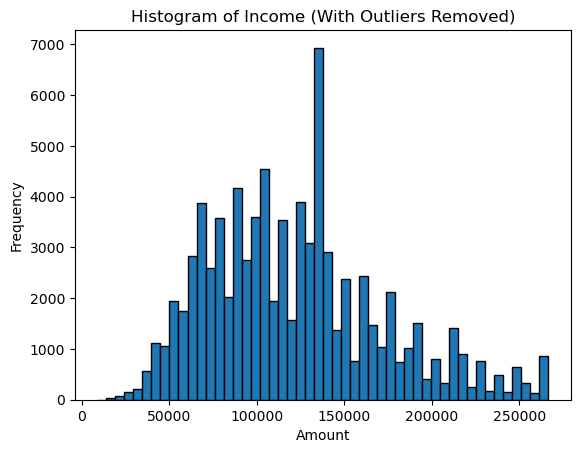

In [117]:
LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640]['Yearly_Income'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Income (With Outliers Removed)')
plt.show()

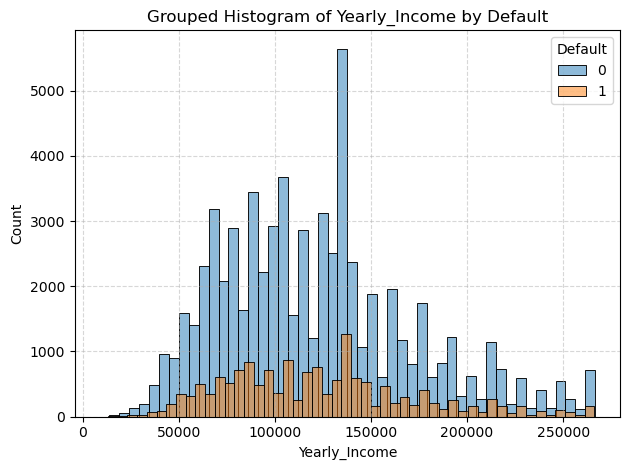

In [118]:
grouped_hist(LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640], 'Yearly_Income', 'Default', 50)

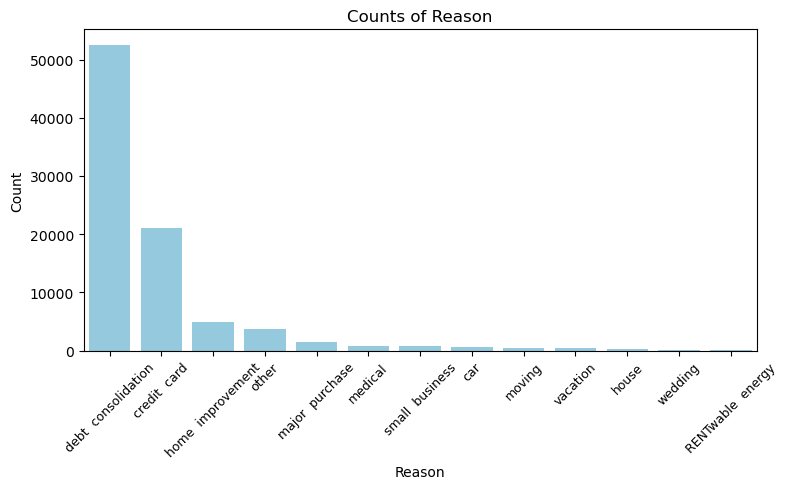

In [119]:
categorical_bar_plots(LoanDefaultPrediction, 'Reason', 'skyblue', 45)

<Axes: xlabel='Account_Open', ylabel='Count'>

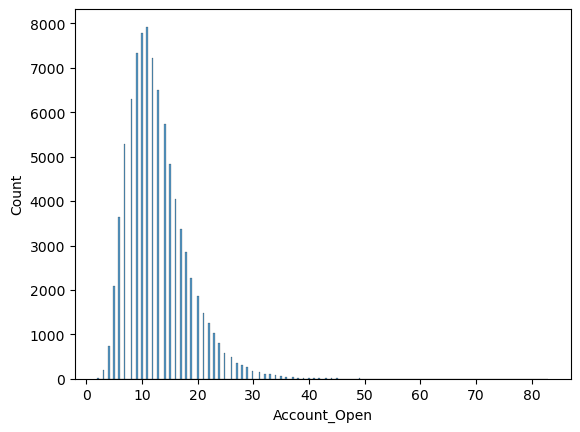

In [120]:
sns.histplot(LoanDefaultPrediction['Account_Open'])

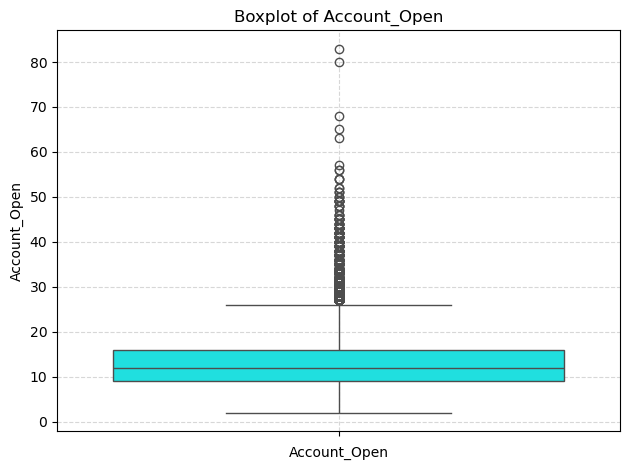

In [121]:
box_plot(LoanDefaultPrediction, 'Account_Open')

In [122]:
col_summary_stastistics(LoanDefaultPrediction, 'Account_Open')

Account_Open Mean: 12.77944
Account_Open Median: 12.0
Account_Open Mode: [11]





=== Analyzing: Debt_to_Income ===


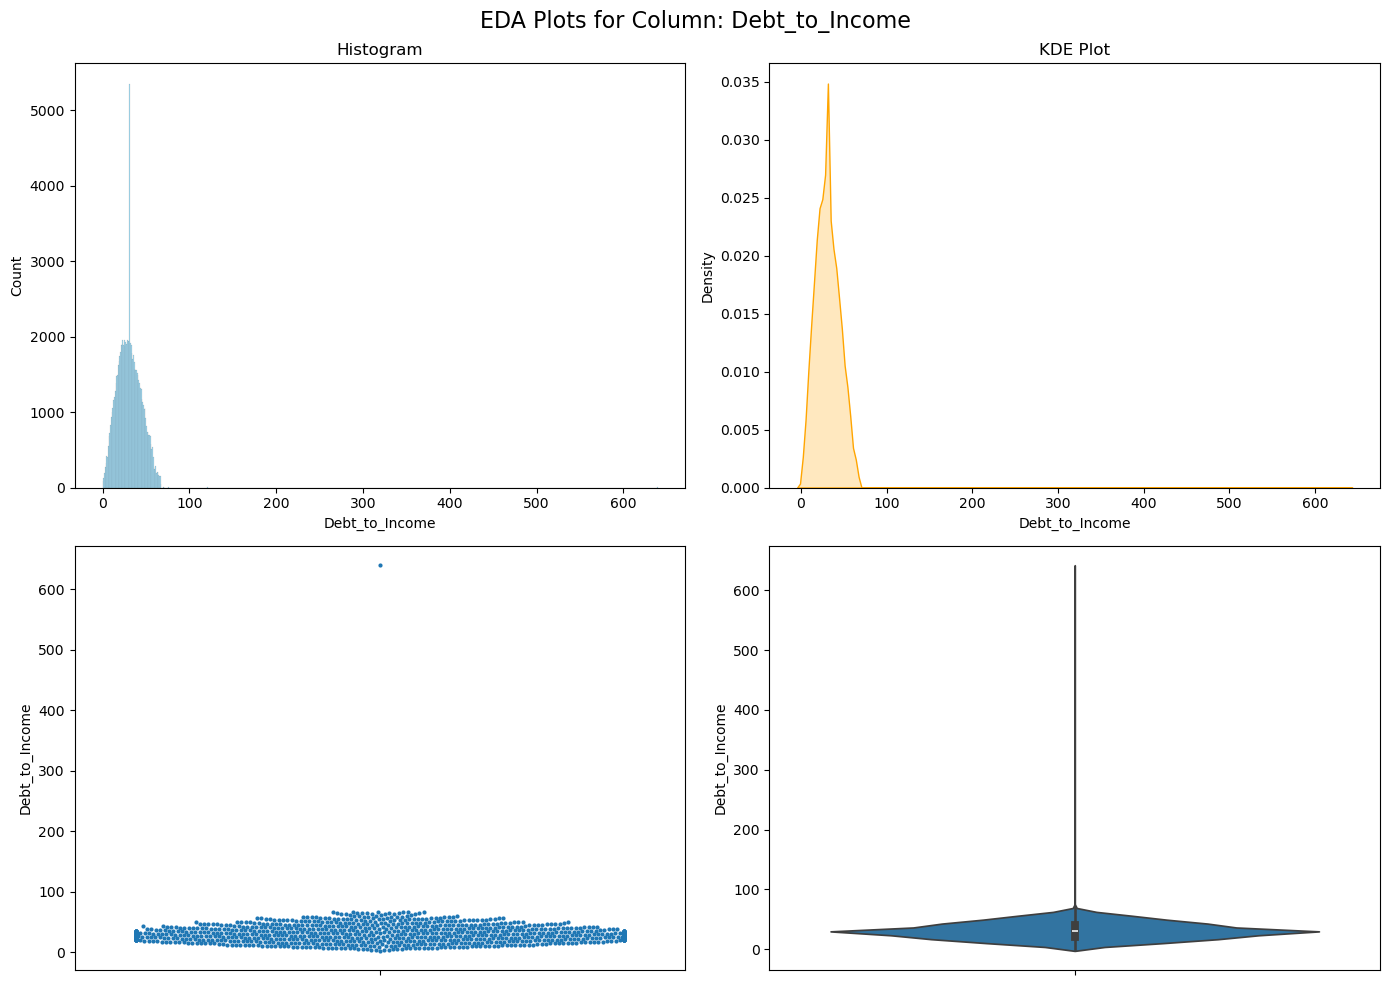

Histogram minimum: 0.0
Histogram maximum: 639.2904


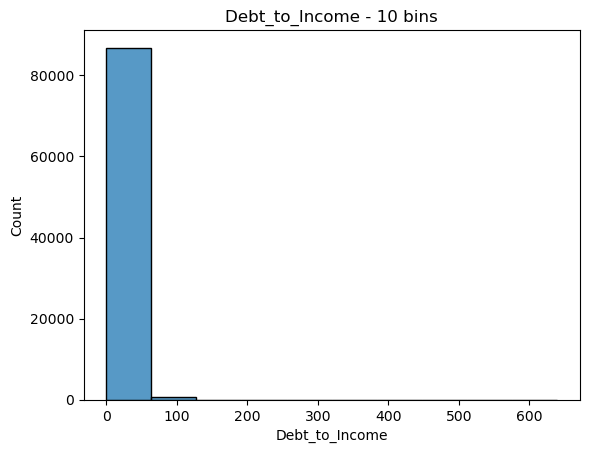

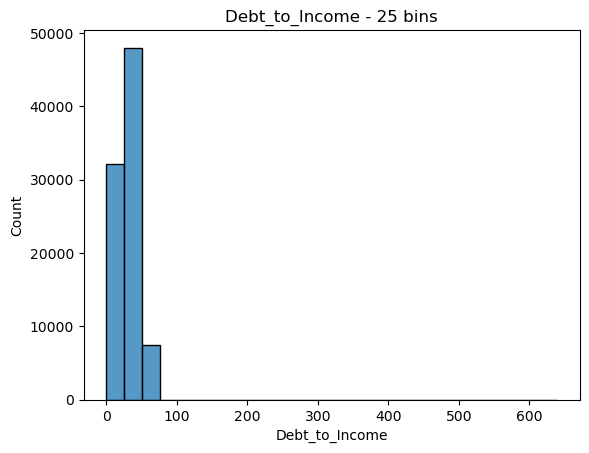

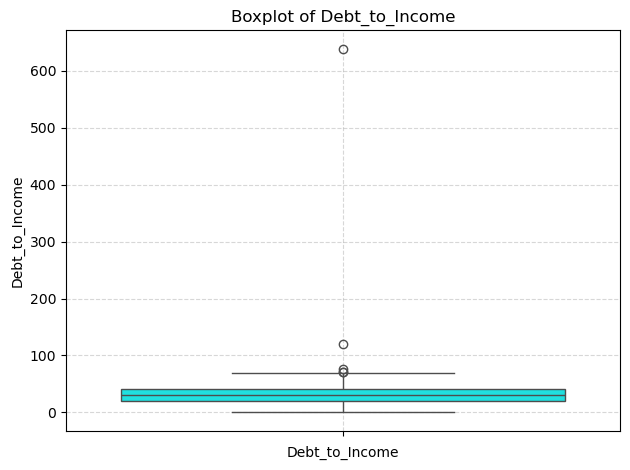

Debt_to_Income Mean: 30.94266038494959
Debt_to_Income Median: 30.912
Debt_to_Income Mode: [30.94266038494959]




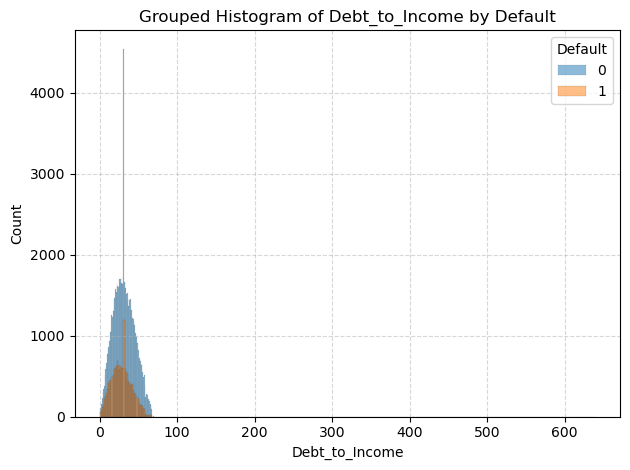


=== Analyzing: Usage_Rate ===


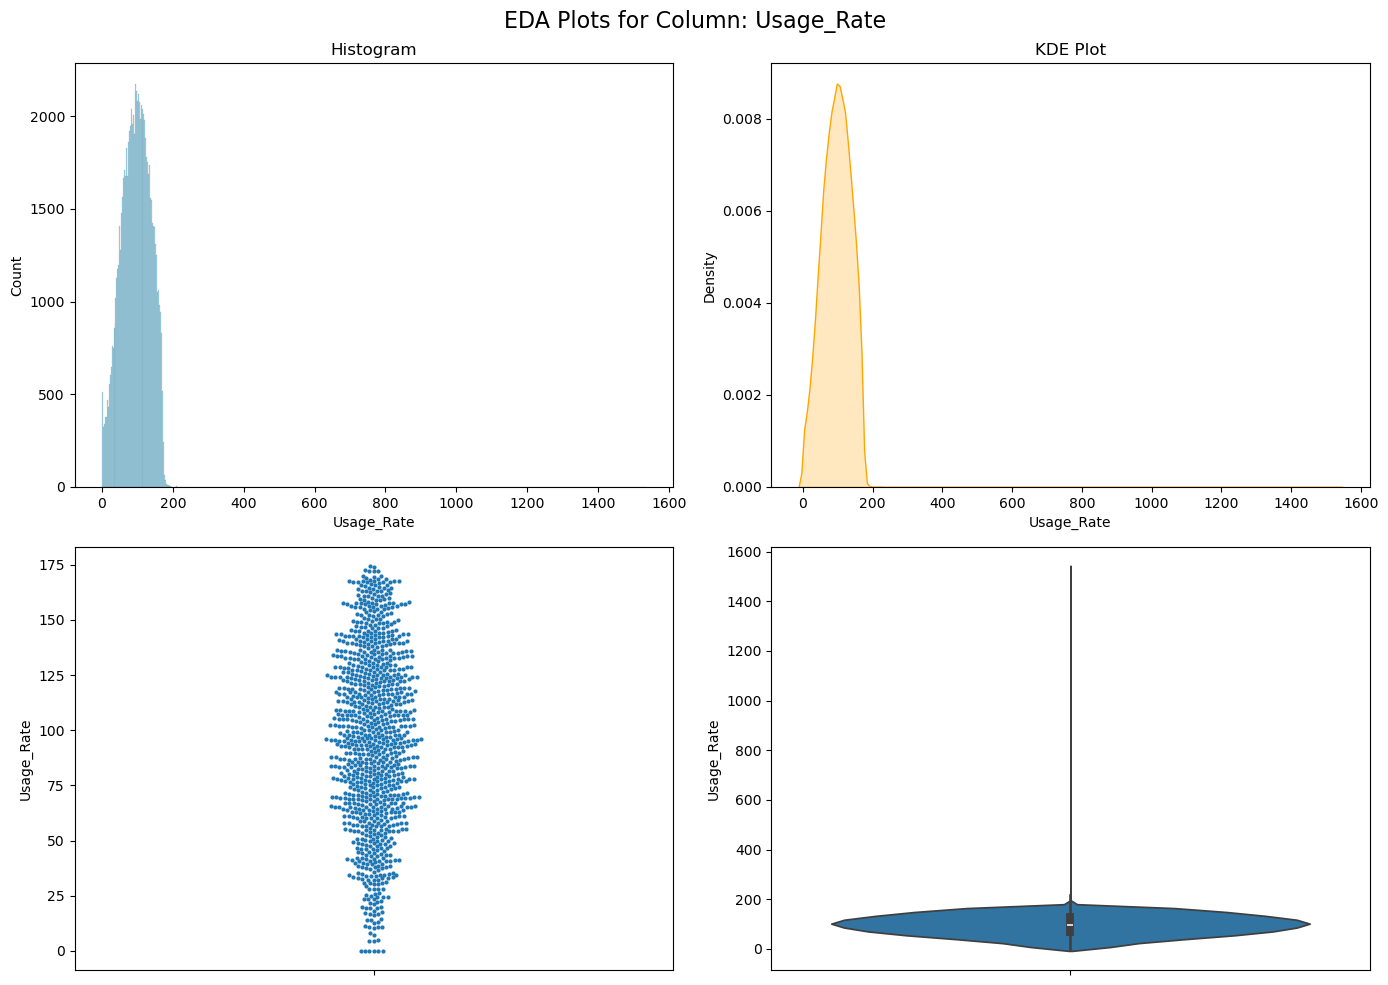

Histogram minimum: 0.0
Histogram maximum: 1534.756


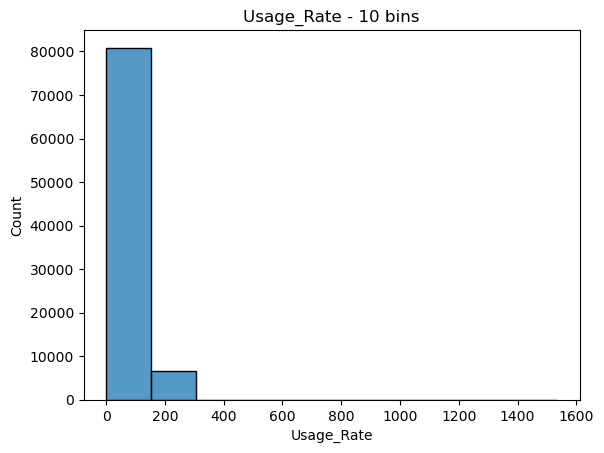

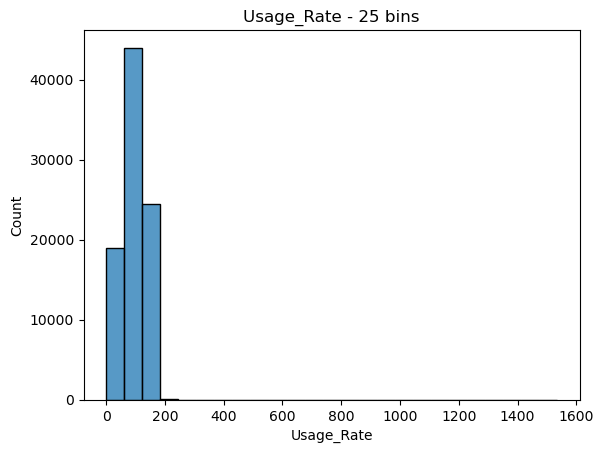

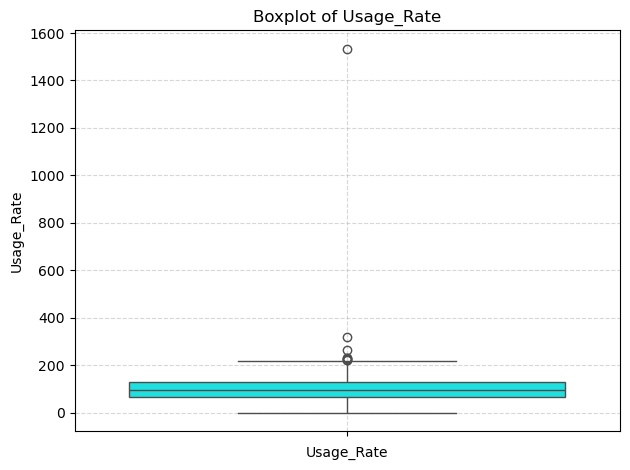

Usage_Rate Mean: 95.51734774857142
Usage_Rate Median: 97.008
Usage_Rate Mode: [0.0]




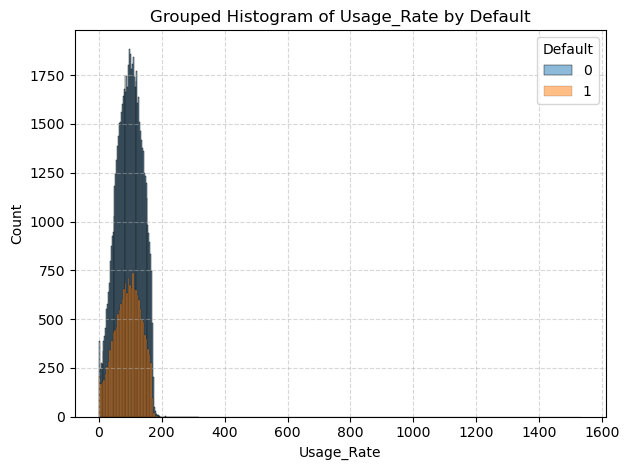


=== Analyzing: Unpaid_Amount ===


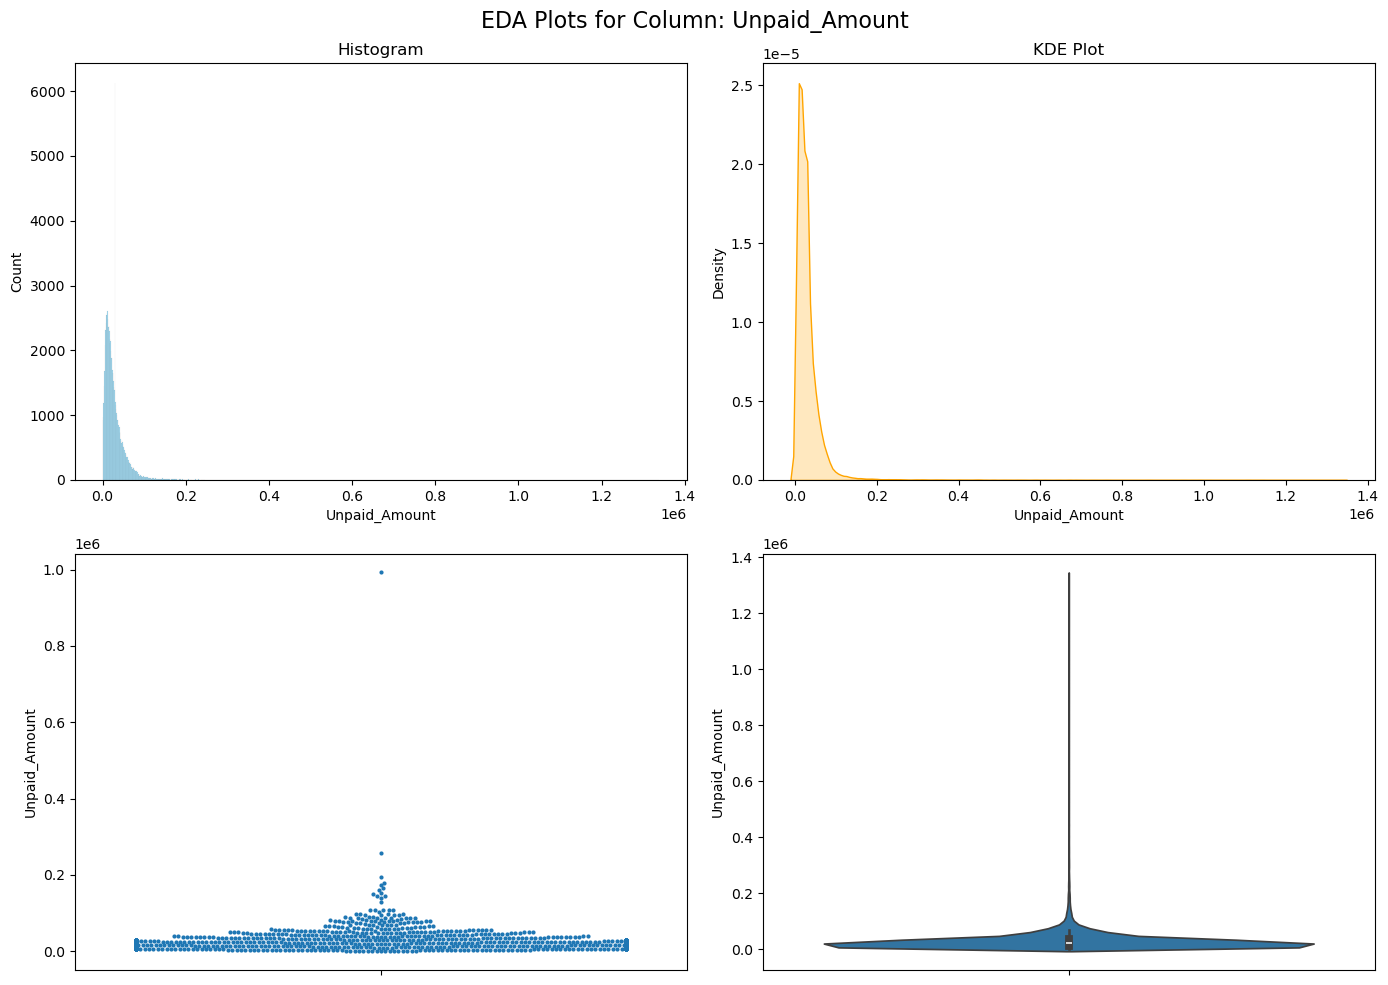

Histogram minimum: 0.0
Histogram maximum: 1338777.81


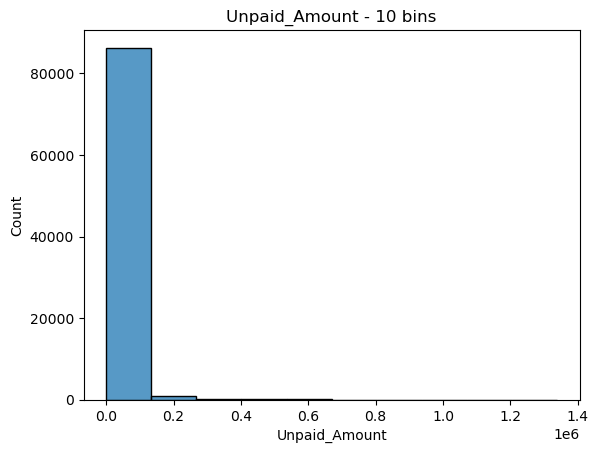

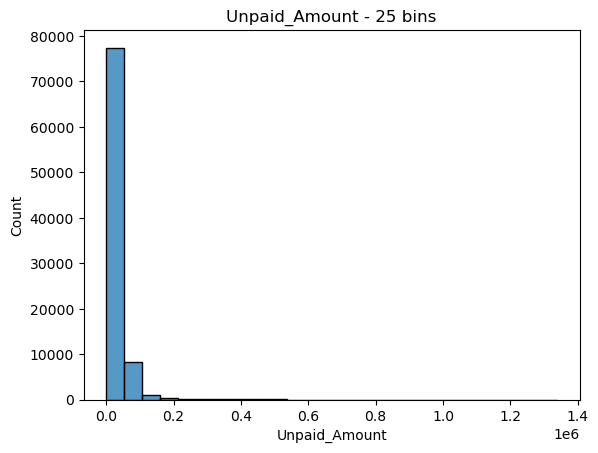

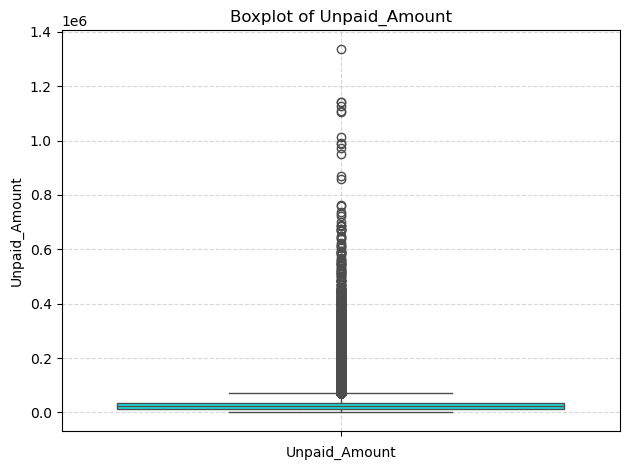

Unpaid_Amount Mean: 29556.494524126418
Unpaid_Amount Median: 22224.87
Unpaid_Amount Mode: [29556.494524126418]




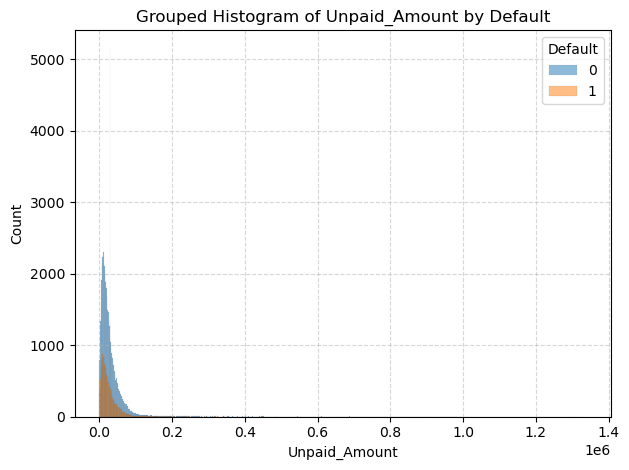

In [123]:
columns = ['Debt_to_Income', 'Usage_Rate', 'Unpaid_Amount']

for col in columns:
    print(f"\n=== Analyzing: {col} ===")
    distribution_plots(LoanDefaultPrediction, col)
    get_hist_min_max(LoanDefaultPrediction, col, 'auto')
    
    plt.figure()
    sns.histplot(LoanDefaultPrediction[col], bins=10)
    plt.title(f'{col} - 10 bins')
    plt.show()
    
    plt.figure()
    sns.histplot(LoanDefaultPrediction[col], bins=25)
    plt.title(f'{col} - 25 bins')
    plt.show()
    
    box_plot(LoanDefaultPrediction, col)
    col_summary_stastistics(LoanDefaultPrediction, col)
    grouped_hist(LoanDefaultPrediction, col, 'Default', 'auto')

### Bivariate Analysis

<Axes: title={'center': 'Correlation Matrix'}>

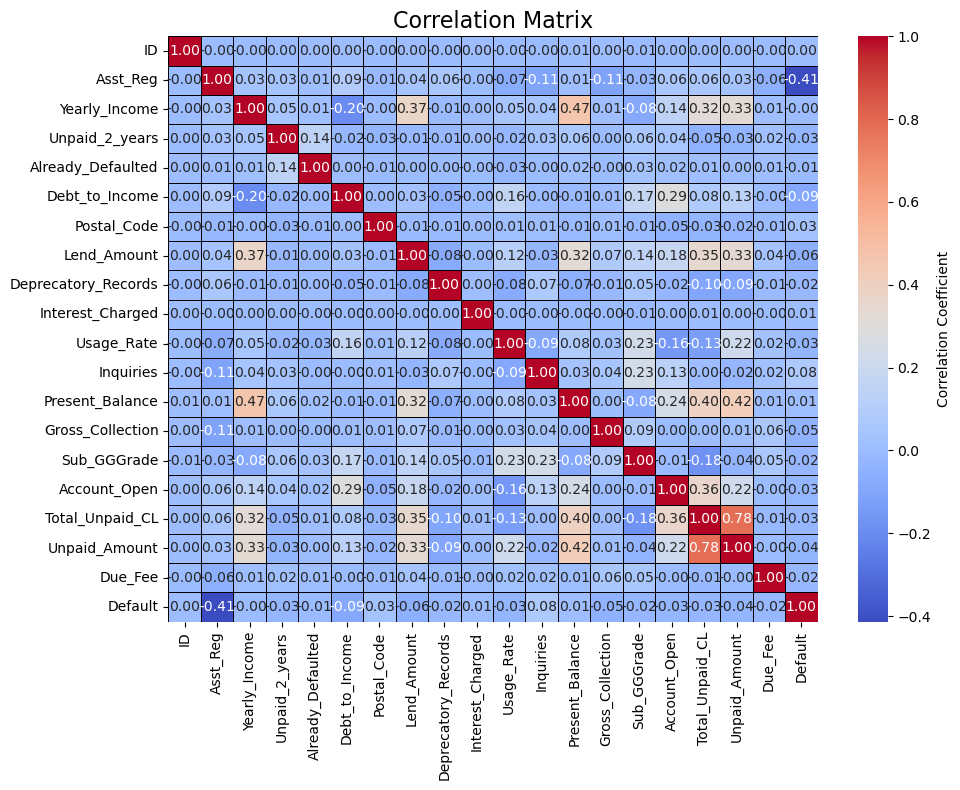

In [125]:
create_correlation_plot(LoanDefaultPrediction)

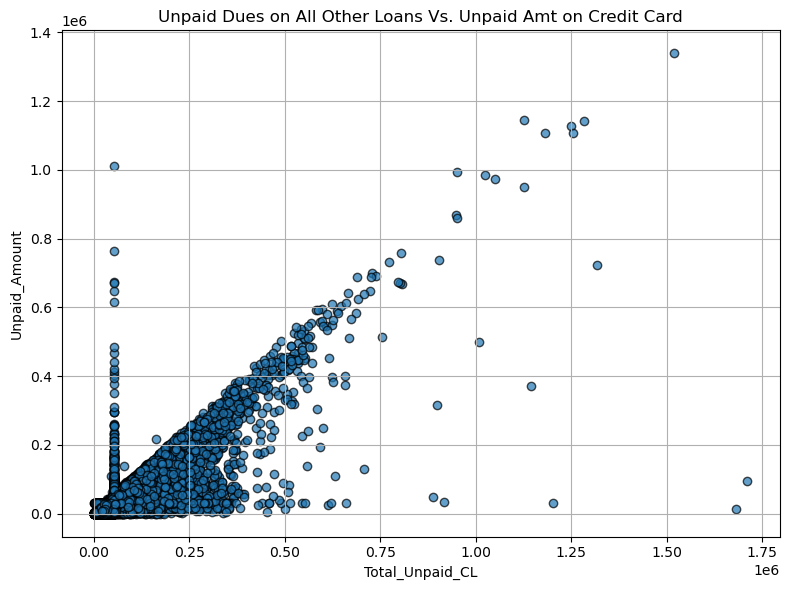

In [126]:
scatter_two_columns(LoanDefaultPrediction, 'Total_Unpaid_CL', 'Unpaid_Amount', title='Unpaid Dues on All Other Loans Vs. Unpaid Amt on Credit Card')

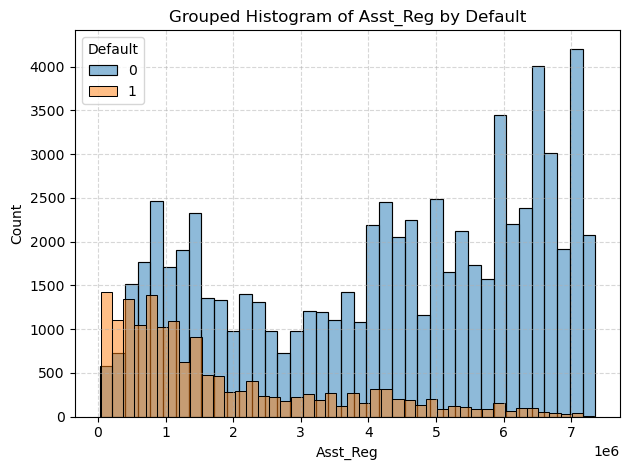

In [127]:
grouped_hist(LoanDefaultPrediction, 'Asst_Reg', 'Default', 'auto')

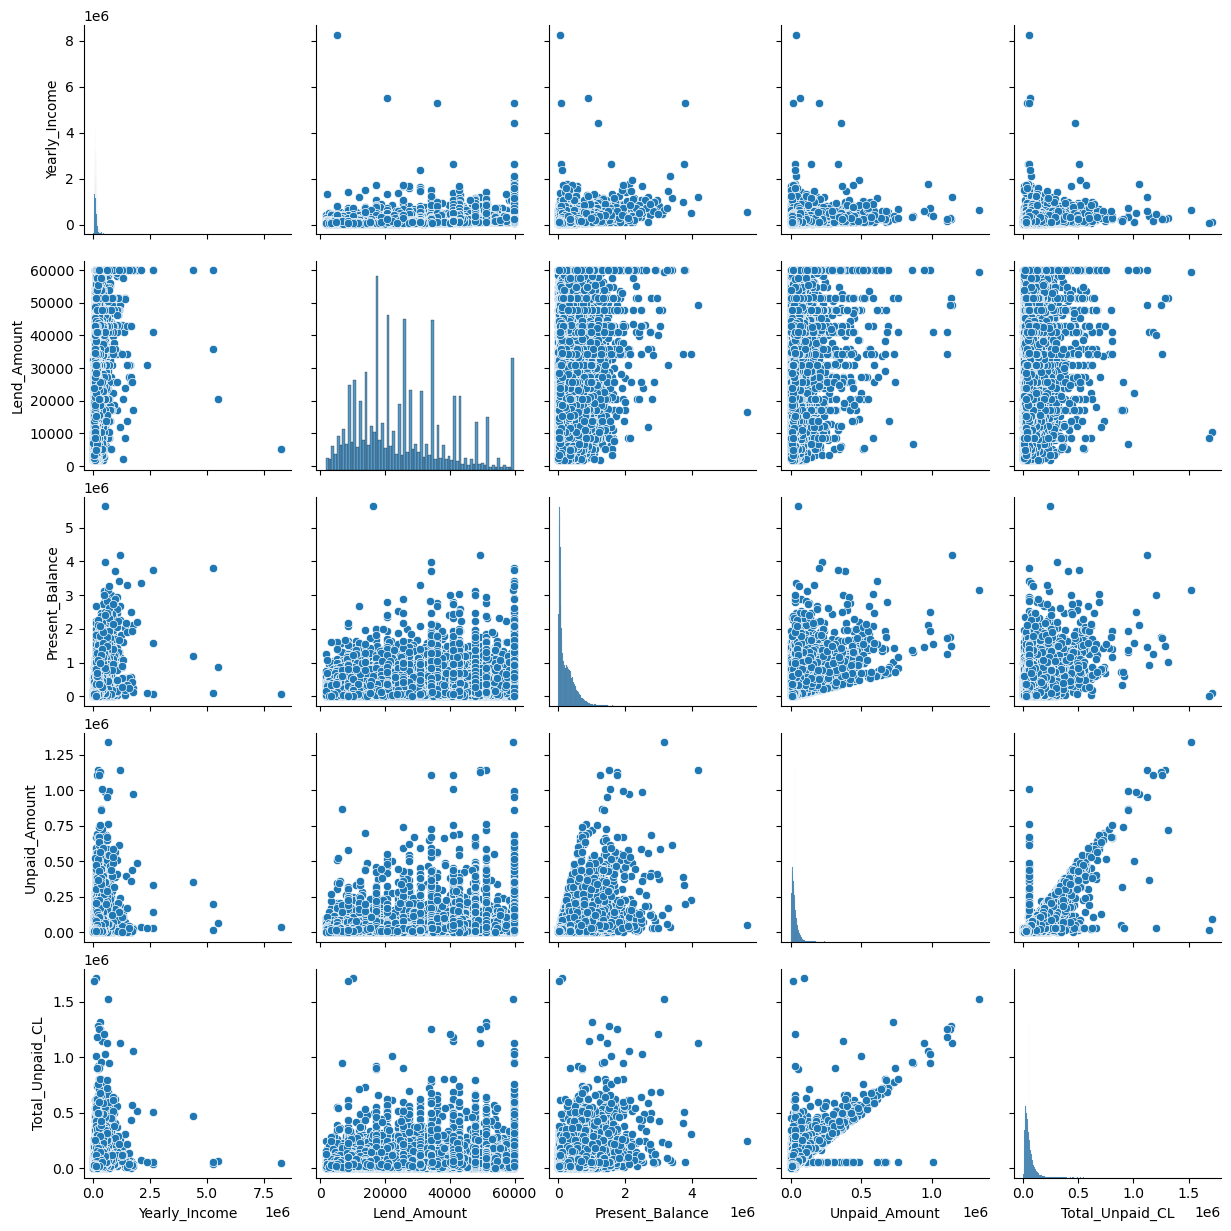

In [128]:
pairplot_selected_columns(LoanDefaultPrediction, columns=['Yearly_Income', 'Lend_Amount', 'Present_Balance', 'Unpaid_Amount', 'Total_Unpaid_CL'])